In [1]:
import tensorflow as tf
import pandas as pd
import os
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras import layers
from keras import backend as K
from keras.layers.core import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.constraints import max_norm


Using TensorFlow backend.


In [2]:
# Import data
train = pd.read_csv("C:/Users/Katta's/PycharmProjects/data/usecase1/train.csv")
test = pd.read_csv("C:/Users/Katta's/PycharmProjects/data/usecase1/test.csv")

In [3]:
train.shape

(200000, 202)

In [4]:
test.shape

(200000, 201)

In [5]:
#Check num of cases in label 
print(train.target.value_counts())
print(train.target.value_counts()[1]/train.target.value_counts()[0])

0    179902
1     20098
Name: target, dtype: int64
0.1117163789174106


In [6]:
train_features = train.drop(['target', 'ID_code'], axis=1)
train_targets = train['target']
test_features = test.drop(['ID_code'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_targets, test_size = 0.25, random_state = 50)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_features = sc.transform(test_features)

In [9]:
# Add RUC metric to monitor NN
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [10]:
input_dim = X_train.shape[1]
input_dim

200

In [11]:
# Try early stopping
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None)
#restore_best_weights=True)


In [12]:
model = Sequential()
# Input layer
model.add(Dense(units = 200, activation = "relu", input_dim = input_dim, kernel_initializer = "normal", 
                kernel_regularizer=regularizers.l2(0.005), 
                kernel_constraint = max_norm(5.)))
# Add dropout regularization
model.add(Dropout(rate=0.2))

# First hidden layer
model.add(Dense(units = 200, activation='relu', kernel_regularizer=regularizers.l2(0.005), 
                kernel_constraint=max_norm(5)))
# Add dropout regularization
model.add(Dropout(rate=0.1))

# Second hidden layer
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.005), kernel_constraint=max_norm(5)))
# Add dropout regularization
model.add(Dropout(rate=0.1))

# Third hidden layer
model.add(Dense(50, activation='tanh', kernel_regularizer=regularizers.l2(0.005), kernel_constraint=max_norm(5)))
# Add dropout regularization
model.add(Dropout(rate=0.1))

# Output layer
model.add(layers.Dense(units = 1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', auc])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
__________

In [13]:
history=model.fit(X_train, y_train, batch_size = 16384, epochs = 125, validation_data = (X_test, y_test))

#history=model.fit(X_train, y_train, batch_size = 16384, epochs = 125, validation_data = (X_test, y_test),callbacks = [callback])



Instructions for updating:
Use tf.cast instead.


Train on 150000 samples, validate on 50000 samples
Epoch 1/125


 16384/150000 [==>...........................] - ETA: 13s - loss: 3.5000 - acc: 0.1526 - auc: 0.4974

 32768/150000 [=====>........................] - ETA: 8s - loss: 3.3155 - acc: 0.3826 - auc: 0.4994 

 49152/150000 [========>.....................] - ETA: 6s - loss: 3.1895 - acc: 0.5470 - auc: 0.5001

 65536/150000 [============>.................] - ETA: 4s - loss: 3.0950 - acc: 0.6358 - auc: 0.5009

 81920/150000 [===============>..............] - ETA: 3s - loss: 3.0266 - acc: 0.6894 - auc: 0.5016

 98304/150000 [==================>...........] - ETA: 2s - loss: 2.9784 - acc: 0.7244 - auc: 0.5017

114688/150000 [=====================>........] - ETA: 1s - loss: 2.9401 - acc: 0.7498 - auc: 0.5020

131072/150000 [=========================>....] - ETA: 0s - loss: 2.9100 - acc: 0.7686 - auc: 0.5023

147456/150000 [============================>.] - ETA: 0s - loss: 2.8858 - acc: 0.7827 - auc: 0.5025

150000/150000 [==============================] - 8s 56us/step - loss: 2.8816 - acc: 0.7847 - auc: 0.5025 - val_loss: 2.6116 - val_acc: 0.8990 - val_auc: 0.5140


Epoch 2/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 2.6203 - acc: 0.8981 - auc: 0.5219

 32768/150000 [=====>........................] - ETA: 4s - loss: 2.6010 - acc: 0.8983 - auc: 0.5238

 49152/150000 [========>.....................] - ETA: 3s - loss: 2.5826 - acc: 0.8981 - auc: 0.5259

 65536/150000 [============>.................] - ETA: 3s - loss: 2.5601 - acc: 0.8990 - auc: 0.5281

 81920/150000 [===============>..............] - ETA: 2s - loss: 2.5379 - acc: 0.8998 - auc: 0.5303

 98304/150000 [==================>...........] - ETA: 1s - loss: 2.5166 - acc: 0.9003 - auc: 0.5325

114688/150000 [=====================>........] - ETA: 1s - loss: 2.4968 - acc: 0.9003 - auc: 0.5347

131072/150000 [=========================>....] - ETA: 0s - loss: 2.4779 - acc: 0.9003 - auc: 0.5366

147456/150000 [============================>.] - ETA: 0s - loss: 2.4598 - acc: 0.8998 - auc: 0.5385

150000/150000 [==============================] - 6s 40us/step - loss: 2.4570 - acc: 0.8997 - auc: 0.5388 - val_loss: 2.2432 - val_acc: 0.8990 - val_auc: 0.5574


Epoch 3/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 2.2447 - acc: 0.9002 - auc: 0.5628

 32768/150000 [=====>........................] - ETA: 4s - loss: 2.2285 - acc: 0.9010 - auc: 0.5641

 49152/150000 [========>.....................] - ETA: 3s - loss: 2.2150 - acc: 0.9005 - auc: 0.5653

 65536/150000 [============>.................] - ETA: 3s - loss: 2.2003 - acc: 0.9006 - auc: 0.5666

 81920/150000 [===============>..............] - ETA: 2s - loss: 2.1869 - acc: 0.9003 - auc: 0.5678

 98304/150000 [==================>...........] - ETA: 2s - loss: 2.1734 - acc: 0.9002 - auc: 0.5691

114688/150000 [=====================>........] - ETA: 1s - loss: 2.1589 - acc: 0.9003 - auc: 0.5703

131072/150000 [=========================>....] - ETA: 0s - loss: 2.1447 - acc: 0.9002 - auc: 0.5717

147456/150000 [============================>.] - ETA: 0s - loss: 2.1310 - acc: 0.8997 - auc: 0.5732

150000/150000 [==============================] - 7s 49us/step - loss: 2.1287 - acc: 0.8997 - auc: 0.5734 - val_loss: 1.9554 - val_acc: 0.8990 - val_auc: 0.5932


Epoch 4/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 1.9590 - acc: 0.8986 - auc: 0.6010

 32768/150000 [=====>........................] - ETA: 4s - loss: 1.9391 - acc: 0.9010 - auc: 0.6029

 49152/150000 [========>.....................] - ETA: 4s - loss: 1.9258 - acc: 0.9004 - auc: 0.6049

 65536/150000 [============>.................] - ETA: 3s - loss: 1.9110 - acc: 0.9004 - auc: 0.6069

 81920/150000 [===============>..............] - ETA: 2s - loss: 1.8973 - acc: 0.9003 - auc: 0.6090

 98304/150000 [==================>...........] - ETA: 2s - loss: 1.8842 - acc: 0.9001 - auc: 0.6110

114688/150000 [=====================>........] - ETA: 1s - loss: 1.8710 - acc: 0.9000 - auc: 0.6131

131072/150000 [=========================>....] - ETA: 0s - loss: 1.8579 - acc: 0.8998 - auc: 0.6151

147456/150000 [============================>.] - ETA: 0s - loss: 1.8452 - acc: 0.8996 - auc: 0.6172

150000/150000 [==============================] - 7s 48us/step - loss: 1.8428 - acc: 0.8997 - auc: 0.6175 - val_loss: 1.6880 - val_acc: 0.8990 - val_auc: 0.6431


Epoch 5/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 1.6944 - acc: 0.8981 - auc: 0.6510

 32768/150000 [=====>........................] - ETA: 5s - loss: 1.6791 - acc: 0.9000 - auc: 0.6528

 49152/150000 [========>.....................] - ETA: 4s - loss: 1.6661 - acc: 0.9003 - auc: 0.6545

 65536/150000 [============>.................] - ETA: 3s - loss: 1.6555 - acc: 0.8999 - auc: 0.6563

 81920/150000 [===============>..............] - ETA: 2s - loss: 1.6443 - acc: 0.8999 - auc: 0.6580

 98304/150000 [==================>...........] - ETA: 2s - loss: 1.6327 - acc: 0.8997 - auc: 0.6597

114688/150000 [=====================>........] - ETA: 1s - loss: 1.6212 - acc: 0.8998 - auc: 0.6613

131072/150000 [=========================>....] - ETA: 0s - loss: 1.6098 - acc: 0.8998 - auc: 0.6630

147456/150000 [============================>.] - ETA: 0s - loss: 1.5986 - acc: 0.8998 - auc: 0.6646

150000/150000 [==============================] - 7s 47us/step - loss: 1.5969 - acc: 0.8997 - auc: 0.6648 - val_loss: 1.4658 - val_acc: 0.8990 - val_auc: 0.6841


Epoch 6/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 1.4722 - acc: 0.8980 - auc: 0.6898

 32768/150000 [=====>........................] - ETA: 5s - loss: 1.4580 - acc: 0.8993 - auc: 0.6911

 49152/150000 [========>.....................] - ETA: 4s - loss: 1.4475 - acc: 0.8995 - auc: 0.6924

 65536/150000 [============>.................] - ETA: 3s - loss: 1.4365 - acc: 0.9001 - auc: 0.6937

 81920/150000 [===============>..............] - ETA: 2s - loss: 1.4264 - acc: 0.9006 - auc: 0.6949

 98304/150000 [==================>...........] - ETA: 2s - loss: 1.4180 - acc: 0.8999 - auc: 0.6961

114688/150000 [=====================>........] - ETA: 1s - loss: 1.4085 - acc: 0.8996 - auc: 0.6973

131072/150000 [=========================>....] - ETA: 0s - loss: 1.3989 - acc: 0.8995 - auc: 0.6985

147456/150000 [============================>.] - ETA: 0s - loss: 1.3894 - acc: 0.8997 - auc: 0.6997

150000/150000 [==============================] - 7s 48us/step - loss: 1.3882 - acc: 0.8997 - auc: 0.6998 - val_loss: 1.2804 - val_acc: 0.8990 - val_auc: 0.7134


Epoch 7/125


 16384/150000 [==>...........................] - ETA: 6s - loss: 1.2901 - acc: 0.8942 - auc: 0.7175

 32768/150000 [=====>........................] - ETA: 5s - loss: 1.2752 - acc: 0.8981 - auc: 0.7184

 49152/150000 [========>.....................] - ETA: 4s - loss: 1.2655 - acc: 0.8994 - auc: 0.7193

 65536/150000 [============>.................] - ETA: 3s - loss: 1.2562 - acc: 0.8998 - auc: 0.7202

 81920/150000 [===============>..............] - ETA: 3s - loss: 1.2472 - acc: 0.9000 - auc: 0.7211

 98304/150000 [==================>...........] - ETA: 2s - loss: 1.2389 - acc: 0.9001 - auc: 0.7220

114688/150000 [=====================>........] - ETA: 1s - loss: 1.2307 - acc: 0.8998 - auc: 0.7228

131072/150000 [=========================>....] - ETA: 0s - loss: 1.2228 - acc: 0.8998 - auc: 0.7237

147456/150000 [============================>.] - ETA: 0s - loss: 1.2151 - acc: 0.8996 - auc: 0.7246

150000/150000 [==============================] - 7s 50us/step - loss: 1.2137 - acc: 0.8997 - auc: 0.7247 - val_loss: 1.1245 - val_acc: 0.8990 - val_auc: 0.7348


Epoch 8/125


 16384/150000 [==>...........................] - ETA: 6s - loss: 1.1172 - acc: 0.9015 - auc: 0.7379

 32768/150000 [=====>........................] - ETA: 5s - loss: 1.1125 - acc: 0.9006 - auc: 0.7387

 49152/150000 [========>.....................] - ETA: 4s - loss: 1.1087 - acc: 0.8991 - auc: 0.7394

 65536/150000 [============>.................] - ETA: 3s - loss: 1.1003 - acc: 0.9006 - auc: 0.7401

 81920/150000 [===============>..............] - ETA: 2s - loss: 1.0926 - acc: 0.9012 - auc: 0.7407

 98304/150000 [==================>...........] - ETA: 2s - loss: 1.0880 - acc: 0.8999 - auc: 0.7414

114688/150000 [=====================>........] - ETA: 1s - loss: 1.0813 - acc: 0.8998 - auc: 0.7421

131072/150000 [=========================>....] - ETA: 0s - loss: 1.0745 - acc: 0.8996 - auc: 0.7427

147456/150000 [============================>.] - ETA: 0s - loss: 1.0678 - acc: 0.8998 - auc: 0.7434

150000/150000 [==============================] - 7s 50us/step - loss: 1.0668 - acc: 0.8997 - auc: 0.7435 - val_loss: 0.9938 - val_acc: 0.8990 - val_auc: 0.7511


Epoch 9/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.9888 - acc: 0.9006 - auc: 0.7534

 32768/150000 [=====>........................] - ETA: 5s - loss: 0.9856 - acc: 0.8988 - auc: 0.7540

 49152/150000 [========>.....................] - ETA: 4s - loss: 0.9799 - acc: 0.8994 - auc: 0.7545

 65536/150000 [============>.................] - ETA: 3s - loss: 0.9746 - acc: 0.8989 - auc: 0.7551

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.9687 - acc: 0.8991 - auc: 0.7556

 98304/150000 [==================>...........] - ETA: 2s - loss: 0.9623 - acc: 0.8994 - auc: 0.7562

114688/150000 [=====================>........] - ETA: 1s - loss: 0.9561 - acc: 0.8996 - auc: 0.7567

131072/150000 [=========================>....] - ETA: 0s - loss: 0.9512 - acc: 0.8995 - auc: 0.7572

147456/150000 [============================>.] - ETA: 0s - loss: 0.9453 - acc: 0.8998 - auc: 0.7577

150000/150000 [==============================] - 7s 49us/step - loss: 0.9444 - acc: 0.9000 - auc: 0.7578 - val_loss: 0.8847 - val_acc: 0.8992 - val_auc: 0.7637


Epoch 10/125


 16384/150000 [==>...........................] - ETA: 6s - loss: 0.8786 - acc: 0.9006 - auc: 0.7655

 32768/150000 [=====>........................] - ETA: 5s - loss: 0.8720 - acc: 0.9004 - auc: 0.7660

 49152/150000 [========>.....................] - ETA: 4s - loss: 0.8682 - acc: 0.8998 - auc: 0.7665

 65536/150000 [============>.................] - ETA: 3s - loss: 0.8637 - acc: 0.9005 - auc: 0.7670

 81920/150000 [===============>..............] - ETA: 3s - loss: 0.8594 - acc: 0.9007 - auc: 0.7674

 98304/150000 [==================>...........] - ETA: 2s - loss: 0.8557 - acc: 0.9001 - auc: 0.7678

114688/150000 [=====================>........] - ETA: 1s - loss: 0.8510 - acc: 0.9003 - auc: 0.7683

131072/150000 [=========================>....] - ETA: 0s - loss: 0.8465 - acc: 0.9006 - auc: 0.7687

147456/150000 [============================>.] - ETA: 0s - loss: 0.8422 - acc: 0.9006 - auc: 0.7691

150000/150000 [==============================] - 7s 50us/step - loss: 0.8417 - acc: 0.9006 - auc: 0.7691 - val_loss: 0.7931 - val_acc: 0.9014 - val_auc: 0.7738


Epoch 11/125


 16384/150000 [==>...........................] - ETA: 6s - loss: 0.7813 - acc: 0.9032 - auc: 0.7754

 32768/150000 [=====>........................] - ETA: 5s - loss: 0.7802 - acc: 0.9025 - auc: 0.7758

 49152/150000 [========>.....................] - ETA: 4s - loss: 0.7750 - acc: 0.9033 - auc: 0.7762

 65536/150000 [============>.................] - ETA: 3s - loss: 0.7724 - acc: 0.9028 - auc: 0.7766

 81920/150000 [===============>..............] - ETA: 3s - loss: 0.7696 - acc: 0.9029 - auc: 0.7770

 98304/150000 [==================>...........] - ETA: 2s - loss: 0.7669 - acc: 0.9021 - auc: 0.7774

114688/150000 [=====================>........] - ETA: 1s - loss: 0.7640 - acc: 0.9026 - auc: 0.7777

131072/150000 [=========================>....] - ETA: 0s - loss: 0.7606 - acc: 0.9028 - auc: 0.7780

147456/150000 [============================>.] - ETA: 0s - loss: 0.7561 - acc: 0.9035 - auc: 0.7784

150000/150000 [==============================] - 7s 45us/step - loss: 0.7556 - acc: 0.9034 - auc: 0.7784 - val_loss: 0.7168 - val_acc: 0.9063 - val_auc: 0.7822


Epoch 12/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.7081 - acc: 0.9072 - auc: 0.7834

 32768/150000 [=====>........................] - ETA: 3s - loss: 0.7085 - acc: 0.9049 - auc: 0.7838

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.7051 - acc: 0.9043 - auc: 0.7841

 65536/150000 [============>.................] - ETA: 2s - loss: 0.6997 - acc: 0.9059 - auc: 0.7844

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.6957 - acc: 0.9064 - auc: 0.7847

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.6929 - acc: 0.9066 - auc: 0.7850

114688/150000 [=====================>........] - ETA: 1s - loss: 0.6895 - acc: 0.9067 - auc: 0.7853

131072/150000 [=========================>....] - ETA: 0s - loss: 0.6871 - acc: 0.9066 - auc: 0.7856

147456/150000 [============================>.] - ETA: 0s - loss: 0.6839 - acc: 0.9069 - auc: 0.7859

150000/150000 [==============================] - 6s 37us/step - loss: 0.6835 - acc: 0.9069 - auc: 0.7860 - val_loss: 0.6521 - val_acc: 0.9097 - val_auc: 0.7892


Epoch 13/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.6456 - acc: 0.9096 - auc: 0.7902

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.6431 - acc: 0.9095 - auc: 0.7904

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.6371 - acc: 0.9107 - auc: 0.7907

 65536/150000 [============>.................] - ETA: 2s - loss: 0.6344 - acc: 0.9098 - auc: 0.7910

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.6329 - acc: 0.9086 - auc: 0.7912

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.6308 - acc: 0.9087 - auc: 0.7915

114688/150000 [=====================>........] - ETA: 1s - loss: 0.6277 - acc: 0.9090 - auc: 0.7918

131072/150000 [=========================>....] - ETA: 0s - loss: 0.6252 - acc: 0.9090 - auc: 0.7920

147456/150000 [============================>.] - ETA: 0s - loss: 0.6229 - acc: 0.9088 - auc: 0.7923

150000/150000 [==============================] - 6s 38us/step - loss: 0.6228 - acc: 0.9087 - auc: 0.7923 - val_loss: 0.5976 - val_acc: 0.9111 - val_auc: 0.7952


Epoch 14/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.5852 - acc: 0.9131 - auc: 0.7961

 32768/150000 [=====>........................] - ETA: 3s - loss: 0.5846 - acc: 0.9126 - auc: 0.7964

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.5834 - acc: 0.9125 - auc: 0.7966

 65536/150000 [============>.................] - ETA: 2s - loss: 0.5824 - acc: 0.9123 - auc: 0.7968

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.5819 - acc: 0.9115 - auc: 0.7970

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.5796 - acc: 0.9113 - auc: 0.7972

114688/150000 [=====================>........] - ETA: 1s - loss: 0.5777 - acc: 0.9112 - auc: 0.7974

131072/150000 [=========================>....] - ETA: 0s - loss: 0.5752 - acc: 0.9112 - auc: 0.7976

147456/150000 [============================>.] - ETA: 0s - loss: 0.5728 - acc: 0.9113 - auc: 0.7979

150000/150000 [==============================] - 6s 37us/step - loss: 0.5723 - acc: 0.9113 - auc: 0.7979 - val_loss: 0.5523 - val_acc: 0.9111 - val_auc: 0.8003


Epoch 15/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.5395 - acc: 0.9126 - auc: 0.8011

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.5426 - acc: 0.9107 - auc: 0.8013

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.5404 - acc: 0.9115 - auc: 0.8015

 65536/150000 [============>.................] - ETA: 2s - loss: 0.5376 - acc: 0.9121 - auc: 0.8017

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.5346 - acc: 0.9124 - auc: 0.8019

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.5338 - acc: 0.9121 - auc: 0.8021

114688/150000 [=====================>........] - ETA: 1s - loss: 0.5321 - acc: 0.9120 - auc: 0.8023

131072/150000 [=========================>....] - ETA: 0s - loss: 0.5311 - acc: 0.9118 - auc: 0.8024

147456/150000 [============================>.] - ETA: 0s - loss: 0.5296 - acc: 0.9119 - auc: 0.8026

150000/150000 [==============================] - 6s 38us/step - loss: 0.5292 - acc: 0.9120 - auc: 0.8026 - val_loss: 0.5132 - val_acc: 0.9118 - val_auc: 0.8047


Epoch 16/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.5065 - acc: 0.9142 - auc: 0.8054

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.5057 - acc: 0.9131 - auc: 0.8055

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.5022 - acc: 0.9137 - auc: 0.8057

 65536/150000 [============>.................] - ETA: 3s - loss: 0.5009 - acc: 0.9134 - auc: 0.8058

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.4982 - acc: 0.9138 - auc: 0.8060

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.4978 - acc: 0.9133 - auc: 0.8062

114688/150000 [=====================>........] - ETA: 1s - loss: 0.4964 - acc: 0.9135 - auc: 0.8063

131072/150000 [=========================>....] - ETA: 0s - loss: 0.4944 - acc: 0.9132 - auc: 0.8065

147456/150000 [============================>.] - ETA: 0s - loss: 0.4935 - acc: 0.9126 - auc: 0.8067

150000/150000 [==============================] - 6s 38us/step - loss: 0.4930 - acc: 0.9127 - auc: 0.8067 - val_loss: 0.4807 - val_acc: 0.9116 - val_auc: 0.8086


Epoch 17/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.4724 - acc: 0.9149 - auc: 0.8092

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.4712 - acc: 0.9124 - auc: 0.8093

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.4705 - acc: 0.9125 - auc: 0.8095

 65536/150000 [============>.................] - ETA: 2s - loss: 0.4711 - acc: 0.9120 - auc: 0.8097

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.4689 - acc: 0.9125 - auc: 0.8098

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.4675 - acc: 0.9130 - auc: 0.8100

114688/150000 [=====================>........] - ETA: 1s - loss: 0.4654 - acc: 0.9132 - auc: 0.8101

131072/150000 [=========================>....] - ETA: 0s - loss: 0.4644 - acc: 0.9129 - auc: 0.8102

147456/150000 [============================>.] - ETA: 0s - loss: 0.4628 - acc: 0.9134 - auc: 0.8104

150000/150000 [==============================] - 6s 38us/step - loss: 0.4626 - acc: 0.9134 - auc: 0.8104 - val_loss: 0.4524 - val_acc: 0.9126 - val_auc: 0.8120


Epoch 18/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.4546 - acc: 0.9081 - auc: 0.8125

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.4482 - acc: 0.9122 - auc: 0.8126

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.4440 - acc: 0.9128 - auc: 0.8127

 65536/150000 [============>.................] - ETA: 2s - loss: 0.4431 - acc: 0.9123 - auc: 0.8129

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.4412 - acc: 0.9127 - auc: 0.8130

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.4396 - acc: 0.9135 - auc: 0.8132

114688/150000 [=====================>........] - ETA: 1s - loss: 0.4392 - acc: 0.9131 - auc: 0.8133

131072/150000 [=========================>....] - ETA: 0s - loss: 0.4382 - acc: 0.9132 - auc: 0.8134

147456/150000 [============================>.] - ETA: 0s - loss: 0.4370 - acc: 0.9135 - auc: 0.8136

150000/150000 [==============================] - 6s 38us/step - loss: 0.4367 - acc: 0.9137 - auc: 0.8136 - val_loss: 0.4291 - val_acc: 0.9124 - val_auc: 0.8150


Epoch 19/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.4266 - acc: 0.9119 - auc: 0.8154

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.4251 - acc: 0.9117 - auc: 0.8155

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.4224 - acc: 0.9131 - auc: 0.8157

 65536/150000 [============>.................] - ETA: 2s - loss: 0.4206 - acc: 0.9131 - auc: 0.8158

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.4185 - acc: 0.9139 - auc: 0.8159

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.4176 - acc: 0.9140 - auc: 0.8160

114688/150000 [=====================>........] - ETA: 1s - loss: 0.4172 - acc: 0.9139 - auc: 0.8161

131072/150000 [=========================>....] - ETA: 0s - loss: 0.4163 - acc: 0.9138 - auc: 0.8162

147456/150000 [============================>.] - ETA: 0s - loss: 0.4154 - acc: 0.9138 - auc: 0.8163

150000/150000 [==============================] - 6s 38us/step - loss: 0.4149 - acc: 0.9139 - auc: 0.8163 - val_loss: 0.4087 - val_acc: 0.9125 - val_auc: 0.8176


Epoch 20/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.4012 - acc: 0.9149 - auc: 0.8180

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.4002 - acc: 0.9141 - auc: 0.8181

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3995 - acc: 0.9144 - auc: 0.8182

 65536/150000 [============>.................] - ETA: 3s - loss: 0.3994 - acc: 0.9140 - auc: 0.8183

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3990 - acc: 0.9142 - auc: 0.8184

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3988 - acc: 0.9139 - auc: 0.8185

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3981 - acc: 0.9140 - auc: 0.8186

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3972 - acc: 0.9138 - auc: 0.8187

147456/150000 [============================>.] - ETA: 0s - loss: 0.3962 - acc: 0.9140 - auc: 0.8188

150000/150000 [==============================] - 6s 39us/step - loss: 0.3960 - acc: 0.9140 - auc: 0.8188 - val_loss: 0.3913 - val_acc: 0.9126 - val_auc: 0.8199


Epoch 21/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.3846 - acc: 0.9152 - auc: 0.8202

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.3807 - acc: 0.9144 - auc: 0.8204

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3795 - acc: 0.9151 - auc: 0.8205

 65536/150000 [============>.................] - ETA: 2s - loss: 0.3799 - acc: 0.9152 - auc: 0.8206

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3790 - acc: 0.9148 - auc: 0.8207

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3794 - acc: 0.9144 - auc: 0.8208

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3798 - acc: 0.9143 - auc: 0.8209

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3792 - acc: 0.9146 - auc: 0.8209

147456/150000 [============================>.] - ETA: 0s - loss: 0.3800 - acc: 0.9141 - auc: 0.8210

150000/150000 [==============================] - 6s 38us/step - loss: 0.3799 - acc: 0.9141 - auc: 0.8210 - val_loss: 0.3762 - val_acc: 0.9127 - val_auc: 0.8220


Epoch 22/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.3711 - acc: 0.9146 - auc: 0.8223

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.3678 - acc: 0.9156 - auc: 0.8224

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3667 - acc: 0.9163 - auc: 0.8225

 65536/150000 [============>.................] - ETA: 2s - loss: 0.3669 - acc: 0.9153 - auc: 0.8226

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3678 - acc: 0.9148 - auc: 0.8227

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3674 - acc: 0.9148 - auc: 0.8227

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3666 - acc: 0.9146 - auc: 0.8228

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3660 - acc: 0.9145 - auc: 0.8229

147456/150000 [============================>.] - ETA: 0s - loss: 0.3664 - acc: 0.9141 - auc: 0.8230

150000/150000 [==============================] - 6s 38us/step - loss: 0.3663 - acc: 0.9142 - auc: 0.8230 - val_loss: 0.3629 - val_acc: 0.9122 - val_auc: 0.8238


Epoch 23/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.3594 - acc: 0.9142 - auc: 0.8241

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.3565 - acc: 0.9148 - auc: 0.8242

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3550 - acc: 0.9143 - auc: 0.8243

 65536/150000 [============>.................] - ETA: 2s - loss: 0.3546 - acc: 0.9148 - auc: 0.8243

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3543 - acc: 0.9146 - auc: 0.8244

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3539 - acc: 0.9146 - auc: 0.8245

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3544 - acc: 0.9142 - auc: 0.8246

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3549 - acc: 0.9140 - auc: 0.8246

147456/150000 [============================>.] - ETA: 0s - loss: 0.3542 - acc: 0.9143 - auc: 0.8247

150000/150000 [==============================] - 6s 38us/step - loss: 0.3541 - acc: 0.9142 - auc: 0.8247 - val_loss: 0.3520 - val_acc: 0.9126 - val_auc: 0.8255


Epoch 24/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.3472 - acc: 0.9177 - auc: 0.8257

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.3439 - acc: 0.9169 - auc: 0.8258

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3451 - acc: 0.9160 - auc: 0.8259

 65536/150000 [============>.................] - ETA: 2s - loss: 0.3448 - acc: 0.9153 - auc: 0.8260

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3451 - acc: 0.9149 - auc: 0.8260

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3445 - acc: 0.9147 - auc: 0.8261

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3440 - acc: 0.9148 - auc: 0.8262

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3437 - acc: 0.9146 - auc: 0.8262

147456/150000 [============================>.] - ETA: 0s - loss: 0.3433 - acc: 0.9145 - auc: 0.8263

150000/150000 [==============================] - 6s 38us/step - loss: 0.3434 - acc: 0.9145 - auc: 0.8263 - val_loss: 0.3420 - val_acc: 0.9125 - val_auc: 0.8270


Epoch 25/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.3362 - acc: 0.9164 - auc: 0.8273

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.3390 - acc: 0.9134 - auc: 0.8273

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3381 - acc: 0.9131 - auc: 0.8274

 65536/150000 [============>.................] - ETA: 2s - loss: 0.3369 - acc: 0.9137 - auc: 0.8275

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3377 - acc: 0.9133 - auc: 0.8275

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3372 - acc: 0.9136 - auc: 0.8276

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3360 - acc: 0.9141 - auc: 0.8276

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3358 - acc: 0.9140 - auc: 0.8277

147456/150000 [============================>.] - ETA: 0s - loss: 0.3347 - acc: 0.9143 - auc: 0.8278

150000/150000 [==============================] - 6s 38us/step - loss: 0.3347 - acc: 0.9144 - auc: 0.8278 - val_loss: 0.3332 - val_acc: 0.9123 - val_auc: 0.8284


Epoch 26/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.3259 - acc: 0.9155 - auc: 0.8286

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.3254 - acc: 0.9155 - auc: 0.8287

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3256 - acc: 0.9156 - auc: 0.8288

 65536/150000 [============>.................] - ETA: 2s - loss: 0.3266 - acc: 0.9150 - auc: 0.8288

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3271 - acc: 0.9146 - auc: 0.8289

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3268 - acc: 0.9146 - auc: 0.8289

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3268 - acc: 0.9142 - auc: 0.8290

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3270 - acc: 0.9141 - auc: 0.8290

147456/150000 [============================>.] - ETA: 0s - loss: 0.3266 - acc: 0.9141 - auc: 0.8291

150000/150000 [==============================] - 6s 38us/step - loss: 0.3262 - acc: 0.9144 - auc: 0.8291 - val_loss: 0.3258 - val_acc: 0.9126 - val_auc: 0.8297


Epoch 27/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.3249 - acc: 0.9126 - auc: 0.8299

 32768/150000 [=====>........................] - ETA: 3s - loss: 0.3220 - acc: 0.9142 - auc: 0.8300

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3212 - acc: 0.9146 - auc: 0.8300

 65536/150000 [============>.................] - ETA: 2s - loss: 0.3190 - acc: 0.9156 - auc: 0.8301

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3192 - acc: 0.9154 - auc: 0.8301

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3196 - acc: 0.9152 - auc: 0.8302

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3199 - acc: 0.9148 - auc: 0.8302

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3201 - acc: 0.9145 - auc: 0.8303

147456/150000 [============================>.] - ETA: 0s - loss: 0.3196 - acc: 0.9145 - auc: 0.8303

150000/150000 [==============================] - 6s 37us/step - loss: 0.3198 - acc: 0.9144 - auc: 0.8303 - val_loss: 0.3188 - val_acc: 0.9128 - val_auc: 0.8309


Epoch 28/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.3105 - acc: 0.9174 - auc: 0.8310

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.3145 - acc: 0.9150 - auc: 0.8311

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3132 - acc: 0.9160 - auc: 0.8311

 65536/150000 [============>.................] - ETA: 2s - loss: 0.3134 - acc: 0.9158 - auc: 0.8312

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3142 - acc: 0.9153 - auc: 0.8312

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3148 - acc: 0.9146 - auc: 0.8313

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3141 - acc: 0.9145 - auc: 0.8313

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3133 - acc: 0.9146 - auc: 0.8314

147456/150000 [============================>.] - ETA: 0s - loss: 0.3134 - acc: 0.9146 - auc: 0.8314

150000/150000 [==============================] - 6s 38us/step - loss: 0.3135 - acc: 0.9145 - auc: 0.8314 - val_loss: 0.3132 - val_acc: 0.9124 - val_auc: 0.8319


Epoch 29/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.3078 - acc: 0.9179 - auc: 0.8321

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.3082 - acc: 0.9154 - auc: 0.8321

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3097 - acc: 0.9146 - auc: 0.8322

 65536/150000 [============>.................] - ETA: 2s - loss: 0.3088 - acc: 0.9148 - auc: 0.8322

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3072 - acc: 0.9153 - auc: 0.8322

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3062 - acc: 0.9154 - auc: 0.8323

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3066 - acc: 0.9151 - auc: 0.8323

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3078 - acc: 0.9144 - auc: 0.8324

147456/150000 [============================>.] - ETA: 0s - loss: 0.3074 - acc: 0.9149 - auc: 0.8324

150000/150000 [==============================] - 6s 38us/step - loss: 0.3076 - acc: 0.9148 - auc: 0.8324 - val_loss: 0.3076 - val_acc: 0.9126 - val_auc: 0.8329


Epoch 30/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.3036 - acc: 0.9175 - auc: 0.8330

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.3030 - acc: 0.9164 - auc: 0.8331

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.3036 - acc: 0.9157 - auc: 0.8331

 65536/150000 [============>.................] - ETA: 2s - loss: 0.3028 - acc: 0.9154 - auc: 0.8331

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.3038 - acc: 0.9145 - auc: 0.8332

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.3031 - acc: 0.9148 - auc: 0.8332

114688/150000 [=====================>........] - ETA: 1s - loss: 0.3030 - acc: 0.9147 - auc: 0.8333

131072/150000 [=========================>....] - ETA: 0s - loss: 0.3022 - acc: 0.9149 - auc: 0.8333

147456/150000 [============================>.] - ETA: 0s - loss: 0.3032 - acc: 0.9146 - auc: 0.8333

150000/150000 [==============================] - 6s 38us/step - loss: 0.3030 - acc: 0.9146 - auc: 0.8334 - val_loss: 0.3030 - val_acc: 0.9126 - val_auc: 0.8338


Epoch 31/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2990 - acc: 0.9130 - auc: 0.8340

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2971 - acc: 0.9151 - auc: 0.8340

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2973 - acc: 0.9149 - auc: 0.8340

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2977 - acc: 0.9147 - auc: 0.8341

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2973 - acc: 0.9151 - auc: 0.8341

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2964 - acc: 0.9156 - auc: 0.8341

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2968 - acc: 0.9155 - auc: 0.8342

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2977 - acc: 0.9151 - auc: 0.8342

147456/150000 [============================>.] - ETA: 0s - loss: 0.2984 - acc: 0.9147 - auc: 0.8342

150000/150000 [==============================] - 6s 38us/step - loss: 0.2984 - acc: 0.9146 - auc: 0.8342 - val_loss: 0.2990 - val_acc: 0.9127 - val_auc: 0.8346


Epoch 32/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2954 - acc: 0.9164 - auc: 0.8348

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2955 - acc: 0.9156 - auc: 0.8348

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2960 - acc: 0.9154 - auc: 0.8348

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2958 - acc: 0.9150 - auc: 0.8348

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2958 - acc: 0.9150 - auc: 0.8349

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2948 - acc: 0.9152 - auc: 0.8349

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2948 - acc: 0.9149 - auc: 0.8350

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2950 - acc: 0.9148 - auc: 0.8350

147456/150000 [============================>.] - ETA: 0s - loss: 0.2947 - acc: 0.9148 - auc: 0.8350

150000/150000 [==============================] - 6s 38us/step - loss: 0.2948 - acc: 0.9147 - auc: 0.8350 - val_loss: 0.2947 - val_acc: 0.9128 - val_auc: 0.8354


Epoch 33/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2926 - acc: 0.9127 - auc: 0.8355

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2895 - acc: 0.9142 - auc: 0.8356

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2889 - acc: 0.9150 - auc: 0.8356

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2913 - acc: 0.9143 - auc: 0.8356

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2906 - acc: 0.9140 - auc: 0.8357

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2913 - acc: 0.9139 - auc: 0.8357

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2914 - acc: 0.9141 - auc: 0.8357

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2912 - acc: 0.9144 - auc: 0.8358

147456/150000 [============================>.] - ETA: 0s - loss: 0.2911 - acc: 0.9145 - auc: 0.8358

150000/150000 [==============================] - 6s 38us/step - loss: 0.2910 - acc: 0.9146 - auc: 0.8358 - val_loss: 0.2913 - val_acc: 0.9127 - val_auc: 0.8361


Epoch 34/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2829 - acc: 0.9168 - auc: 0.8363

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2851 - acc: 0.9159 - auc: 0.8363

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2889 - acc: 0.9143 - auc: 0.8363

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2901 - acc: 0.9139 - auc: 0.8363

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2895 - acc: 0.9142 - auc: 0.8364

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2881 - acc: 0.9149 - auc: 0.8364

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2874 - acc: 0.9153 - auc: 0.8364

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2884 - acc: 0.9150 - auc: 0.8365

147456/150000 [============================>.] - ETA: 0s - loss: 0.2883 - acc: 0.9150 - auc: 0.8365

150000/150000 [==============================] - 6s 38us/step - loss: 0.2882 - acc: 0.9150 - auc: 0.8365 - val_loss: 0.2883 - val_acc: 0.9131 - val_auc: 0.8368


Epoch 35/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2819 - acc: 0.9165 - auc: 0.8369

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2834 - acc: 0.9148 - auc: 0.8370

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2832 - acc: 0.9145 - auc: 0.8370

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2831 - acc: 0.9151 - auc: 0.8370

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2853 - acc: 0.9138 - auc: 0.8370

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2850 - acc: 0.9139 - auc: 0.8371

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2849 - acc: 0.9141 - auc: 0.8371

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2861 - acc: 0.9136 - auc: 0.8371

147456/150000 [============================>.] - ETA: 0s - loss: 0.2852 - acc: 0.9142 - auc: 0.8371

150000/150000 [==============================] - 6s 37us/step - loss: 0.2851 - acc: 0.9143 - auc: 0.8371 - val_loss: 0.2856 - val_acc: 0.9128 - val_auc: 0.8374


Epoch 36/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2838 - acc: 0.9141 - auc: 0.8376

 32768/150000 [=====>........................] - ETA: 3s - loss: 0.2845 - acc: 0.9145 - auc: 0.8376

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2846 - acc: 0.9144 - auc: 0.8376

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2846 - acc: 0.9142 - auc: 0.8376

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2845 - acc: 0.9147 - auc: 0.8376

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2834 - acc: 0.9148 - auc: 0.8377

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2833 - acc: 0.9148 - auc: 0.8377

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2829 - acc: 0.9148 - auc: 0.8377

147456/150000 [============================>.] - ETA: 0s - loss: 0.2825 - acc: 0.9149 - auc: 0.8377

150000/150000 [==============================] - 6s 37us/step - loss: 0.2825 - acc: 0.9149 - auc: 0.8377 - val_loss: 0.2830 - val_acc: 0.9132 - val_auc: 0.8380


Epoch 37/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2840 - acc: 0.9136 - auc: 0.8381

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2827 - acc: 0.9147 - auc: 0.8381

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2799 - acc: 0.9148 - auc: 0.8382

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2802 - acc: 0.9146 - auc: 0.8382

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2797 - acc: 0.9146 - auc: 0.8382

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2795 - acc: 0.9148 - auc: 0.8382

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2801 - acc: 0.9144 - auc: 0.8383

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2812 - acc: 0.9143 - auc: 0.8383

147456/150000 [============================>.] - ETA: 0s - loss: 0.2806 - acc: 0.9147 - auc: 0.8383

150000/150000 [==============================] - 6s 38us/step - loss: 0.2803 - acc: 0.9148 - auc: 0.8383 - val_loss: 0.2809 - val_acc: 0.9126 - val_auc: 0.8386


Epoch 38/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2832 - acc: 0.9126 - auc: 0.8387

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2777 - acc: 0.9157 - auc: 0.8387

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2786 - acc: 0.9153 - auc: 0.8387

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2793 - acc: 0.9145 - auc: 0.8387

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2797 - acc: 0.9144 - auc: 0.8388

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2782 - acc: 0.9152 - auc: 0.8388

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2784 - acc: 0.9152 - auc: 0.8388

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2794 - acc: 0.9147 - auc: 0.8388

147456/150000 [============================>.] - ETA: 0s - loss: 0.2783 - acc: 0.9152 - auc: 0.8388

150000/150000 [==============================] - 6s 37us/step - loss: 0.2783 - acc: 0.9151 - auc: 0.8388 - val_loss: 0.2784 - val_acc: 0.9125 - val_auc: 0.8391


Epoch 39/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2732 - acc: 0.9162 - auc: 0.8392

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2745 - acc: 0.9151 - auc: 0.8392

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2745 - acc: 0.9148 - auc: 0.8392

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2755 - acc: 0.9150 - auc: 0.8393

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2762 - acc: 0.9151 - auc: 0.8393

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2756 - acc: 0.9156 - auc: 0.8393

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2763 - acc: 0.9153 - auc: 0.8393

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2758 - acc: 0.9153 - auc: 0.8393

147456/150000 [============================>.] - ETA: 0s - loss: 0.2759 - acc: 0.9154 - auc: 0.8394

150000/150000 [==============================] - 6s 38us/step - loss: 0.2762 - acc: 0.9152 - auc: 0.8394 - val_loss: 0.2765 - val_acc: 0.9129 - val_auc: 0.8396


Epoch 40/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2818 - acc: 0.9125 - auc: 0.8397

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2773 - acc: 0.9144 - auc: 0.8397

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2739 - acc: 0.9159 - auc: 0.8397

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2742 - acc: 0.9152 - auc: 0.8397

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2746 - acc: 0.9151 - auc: 0.8398

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2738 - acc: 0.9153 - auc: 0.8398

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2743 - acc: 0.9152 - auc: 0.8398

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2740 - acc: 0.9155 - auc: 0.8398

147456/150000 [============================>.] - ETA: 0s - loss: 0.2747 - acc: 0.9151 - auc: 0.8398

150000/150000 [==============================] - 6s 37us/step - loss: 0.2747 - acc: 0.9151 - auc: 0.8398 - val_loss: 0.2749 - val_acc: 0.9128 - val_auc: 0.8400


Epoch 41/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2672 - acc: 0.9171 - auc: 0.8401

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2706 - acc: 0.9164 - auc: 0.8401

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2731 - acc: 0.9149 - auc: 0.8402

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2734 - acc: 0.9146 - auc: 0.8402

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2735 - acc: 0.9142 - auc: 0.8402

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2745 - acc: 0.9136 - auc: 0.8402

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2747 - acc: 0.9135 - auc: 0.8402

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2736 - acc: 0.9140 - auc: 0.8402

147456/150000 [============================>.] - ETA: 0s - loss: 0.2726 - acc: 0.9145 - auc: 0.8403

150000/150000 [==============================] - 6s 38us/step - loss: 0.2726 - acc: 0.9145 - auc: 0.8403 - val_loss: 0.2738 - val_acc: 0.9127 - val_auc: 0.8405


Epoch 42/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2749 - acc: 0.9128 - auc: 0.8406

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2725 - acc: 0.9138 - auc: 0.8406

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2724 - acc: 0.9145 - auc: 0.8406

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2723 - acc: 0.9147 - auc: 0.8406

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2731 - acc: 0.9140 - auc: 0.8406

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2714 - acc: 0.9150 - auc: 0.8406

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2722 - acc: 0.9145 - auc: 0.8406

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2720 - acc: 0.9146 - auc: 0.8407

147456/150000 [============================>.] - ETA: 0s - loss: 0.2717 - acc: 0.9147 - auc: 0.8407

150000/150000 [==============================] - 6s 37us/step - loss: 0.2716 - acc: 0.9148 - auc: 0.8407 - val_loss: 0.2719 - val_acc: 0.9131 - val_auc: 0.8409


Epoch 43/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2704 - acc: 0.9148 - auc: 0.8410

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2709 - acc: 0.9143 - auc: 0.8410

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2694 - acc: 0.9155 - auc: 0.8410

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2701 - acc: 0.9151 - auc: 0.8410

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2698 - acc: 0.9146 - auc: 0.8410

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2691 - acc: 0.9146 - auc: 0.8411

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2701 - acc: 0.9144 - auc: 0.8411

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2702 - acc: 0.9146 - auc: 0.8411

147456/150000 [============================>.] - ETA: 0s - loss: 0.2703 - acc: 0.9147 - auc: 0.8411

150000/150000 [==============================] - 6s 38us/step - loss: 0.2701 - acc: 0.9147 - auc: 0.8411 - val_loss: 0.2704 - val_acc: 0.9135 - val_auc: 0.8413


Epoch 44/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2705 - acc: 0.9150 - auc: 0.8414

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2677 - acc: 0.9150 - auc: 0.8414

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2694 - acc: 0.9137 - auc: 0.8414

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2681 - acc: 0.9141 - auc: 0.8414

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2686 - acc: 0.9142 - auc: 0.8414

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2683 - acc: 0.9146 - auc: 0.8415

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2684 - acc: 0.9145 - auc: 0.8415

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2687 - acc: 0.9144 - auc: 0.8415

147456/150000 [============================>.] - ETA: 0s - loss: 0.2683 - acc: 0.9145 - auc: 0.8415

150000/150000 [==============================] - 6s 38us/step - loss: 0.2685 - acc: 0.9144 - auc: 0.8415 - val_loss: 0.2692 - val_acc: 0.9128 - val_auc: 0.8417


Epoch 45/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2705 - acc: 0.9161 - auc: 0.8417

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2688 - acc: 0.9150 - auc: 0.8418

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2664 - acc: 0.9157 - auc: 0.8418

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2648 - acc: 0.9165 - auc: 0.8418

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2645 - acc: 0.9168 - auc: 0.8418

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2665 - acc: 0.9157 - auc: 0.8418

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2676 - acc: 0.9151 - auc: 0.8418

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2678 - acc: 0.9148 - auc: 0.8419

147456/150000 [============================>.] - ETA: 0s - loss: 0.2672 - acc: 0.9150 - auc: 0.8419

150000/150000 [==============================] - 6s 37us/step - loss: 0.2674 - acc: 0.9149 - auc: 0.8419 - val_loss: 0.2683 - val_acc: 0.9130 - val_auc: 0.8421


Epoch 46/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2670 - acc: 0.9131 - auc: 0.8421

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2666 - acc: 0.9146 - auc: 0.8421

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2649 - acc: 0.9157 - auc: 0.8422

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2647 - acc: 0.9151 - auc: 0.8422

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2646 - acc: 0.9149 - auc: 0.8422

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2649 - acc: 0.9152 - auc: 0.8422

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2659 - acc: 0.9149 - auc: 0.8422

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2665 - acc: 0.9148 - auc: 0.8422

147456/150000 [============================>.] - ETA: 0s - loss: 0.2664 - acc: 0.9151 - auc: 0.8422

150000/150000 [==============================] - 6s 38us/step - loss: 0.2663 - acc: 0.9151 - auc: 0.8422 - val_loss: 0.2672 - val_acc: 0.9135 - val_auc: 0.8424


Epoch 47/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2727 - acc: 0.9117 - auc: 0.8425

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2695 - acc: 0.9130 - auc: 0.8425

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2668 - acc: 0.9141 - auc: 0.8425

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2659 - acc: 0.9146 - auc: 0.8425

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2644 - acc: 0.9151 - auc: 0.8425

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2644 - acc: 0.9150 - auc: 0.8425

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2643 - acc: 0.9149 - auc: 0.8425

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2653 - acc: 0.9146 - auc: 0.8426

147456/150000 [============================>.] - ETA: 0s - loss: 0.2652 - acc: 0.9145 - auc: 0.8426

150000/150000 [==============================] - 6s 38us/step - loss: 0.2654 - acc: 0.9145 - auc: 0.8426 - val_loss: 0.2657 - val_acc: 0.9130 - val_auc: 0.8427


Epoch 48/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2652 - acc: 0.9145 - auc: 0.8428

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2642 - acc: 0.9153 - auc: 0.8428

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2630 - acc: 0.9158 - auc: 0.8428

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2628 - acc: 0.9158 - auc: 0.8428

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2628 - acc: 0.9158 - auc: 0.8428

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2630 - acc: 0.9157 - auc: 0.8429

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2638 - acc: 0.9153 - auc: 0.8429

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2643 - acc: 0.9147 - auc: 0.8429

147456/150000 [============================>.] - ETA: 0s - loss: 0.2641 - acc: 0.9149 - auc: 0.8429

150000/150000 [==============================] - 6s 37us/step - loss: 0.2645 - acc: 0.9148 - auc: 0.8429 - val_loss: 0.2658 - val_acc: 0.9127 - val_auc: 0.8431


Epoch 49/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2666 - acc: 0.9141 - auc: 0.8431

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2675 - acc: 0.9134 - auc: 0.8431

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2649 - acc: 0.9146 - auc: 0.8431

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2652 - acc: 0.9148 - auc: 0.8431

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2654 - acc: 0.9145 - auc: 0.8432

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2640 - acc: 0.9151 - auc: 0.8432

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2638 - acc: 0.9149 - auc: 0.8432

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2639 - acc: 0.9149 - auc: 0.8432

147456/150000 [============================>.] - ETA: 0s - loss: 0.2643 - acc: 0.9145 - auc: 0.8432

150000/150000 [==============================] - 6s 38us/step - loss: 0.2638 - acc: 0.9146 - auc: 0.8432 - val_loss: 0.2645 - val_acc: 0.9135 - val_auc: 0.8434


Epoch 50/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2648 - acc: 0.9138 - auc: 0.8434

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2653 - acc: 0.9141 - auc: 0.8434

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2639 - acc: 0.9136 - auc: 0.8434

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2634 - acc: 0.9143 - auc: 0.8434

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2628 - acc: 0.9147 - auc: 0.8435

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2611 - acc: 0.9153 - auc: 0.8435

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2613 - acc: 0.9151 - auc: 0.8435

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2627 - acc: 0.9147 - auc: 0.8435

147456/150000 [============================>.] - ETA: 0s - loss: 0.2632 - acc: 0.9147 - auc: 0.8435

150000/150000 [==============================] - 6s 38us/step - loss: 0.2631 - acc: 0.9148 - auc: 0.8435 - val_loss: 0.2633 - val_acc: 0.9129 - val_auc: 0.8436


Epoch 51/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2610 - acc: 0.9176 - auc: 0.8437

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2603 - acc: 0.9167 - auc: 0.8437

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2619 - acc: 0.9154 - auc: 0.8437

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2632 - acc: 0.9144 - auc: 0.8437

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2629 - acc: 0.9144 - auc: 0.8437

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2632 - acc: 0.9141 - auc: 0.8438

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2634 - acc: 0.9142 - auc: 0.8438

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2622 - acc: 0.9147 - auc: 0.8438

147456/150000 [============================>.] - ETA: 0s - loss: 0.2621 - acc: 0.9147 - auc: 0.8438

150000/150000 [==============================] - 6s 37us/step - loss: 0.2624 - acc: 0.9146 - auc: 0.8438 - val_loss: 0.2630 - val_acc: 0.9130 - val_auc: 0.8439


Epoch 52/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2588 - acc: 0.9149 - auc: 0.8440

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2560 - acc: 0.9173 - auc: 0.8440

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2589 - acc: 0.9155 - auc: 0.8440

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2618 - acc: 0.9145 - auc: 0.8440

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2612 - acc: 0.9148 - auc: 0.8440

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2610 - acc: 0.9149 - auc: 0.8440

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2610 - acc: 0.9150 - auc: 0.8441

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2608 - acc: 0.9145 - auc: 0.8441

147456/150000 [============================>.] - ETA: 0s - loss: 0.2609 - acc: 0.9147 - auc: 0.8441

150000/150000 [==============================] - 6s 37us/step - loss: 0.2612 - acc: 0.9146 - auc: 0.8441 - val_loss: 0.2624 - val_acc: 0.9133 - val_auc: 0.8442


Epoch 53/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2649 - acc: 0.9126 - auc: 0.8443

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2619 - acc: 0.9142 - auc: 0.8443

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2603 - acc: 0.9152 - auc: 0.8443

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2601 - acc: 0.9152 - auc: 0.8443

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2601 - acc: 0.9149 - auc: 0.8443

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2602 - acc: 0.9146 - auc: 0.8443

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2604 - acc: 0.9148 - auc: 0.8443

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2613 - acc: 0.9145 - auc: 0.8443

147456/150000 [============================>.] - ETA: 0s - loss: 0.2607 - acc: 0.9147 - auc: 0.8444

150000/150000 [==============================] - 6s 37us/step - loss: 0.2609 - acc: 0.9146 - auc: 0.8444 - val_loss: 0.2614 - val_acc: 0.9131 - val_auc: 0.8445


Epoch 54/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2539 - acc: 0.9177 - auc: 0.8445

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2572 - acc: 0.9164 - auc: 0.8445

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2597 - acc: 0.9155 - auc: 0.8445

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2607 - acc: 0.9151 - auc: 0.8446

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2614 - acc: 0.9145 - auc: 0.8446

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2600 - acc: 0.9150 - auc: 0.8446

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2604 - acc: 0.9147 - auc: 0.8446

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2605 - acc: 0.9147 - auc: 0.8446

147456/150000 [============================>.] - ETA: 0s - loss: 0.2600 - acc: 0.9150 - auc: 0.8446

150000/150000 [==============================] - 6s 38us/step - loss: 0.2601 - acc: 0.9150 - auc: 0.8446 - val_loss: 0.2615 - val_acc: 0.9133 - val_auc: 0.8447


Epoch 55/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2585 - acc: 0.9163 - auc: 0.8448

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2579 - acc: 0.9159 - auc: 0.8448

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2592 - acc: 0.9158 - auc: 0.8448

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2595 - acc: 0.9156 - auc: 0.8448

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2586 - acc: 0.9156 - auc: 0.8448

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2600 - acc: 0.9149 - auc: 0.8448

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2601 - acc: 0.9150 - auc: 0.8448

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2605 - acc: 0.9144 - auc: 0.8448

147456/150000 [============================>.] - ETA: 0s - loss: 0.2602 - acc: 0.9144 - auc: 0.8449

150000/150000 [==============================] - 6s 38us/step - loss: 0.2599 - acc: 0.9146 - auc: 0.8449 - val_loss: 0.2606 - val_acc: 0.9130 - val_auc: 0.8450


Epoch 56/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2706 - acc: 0.9091 - auc: 0.8450

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2638 - acc: 0.9120 - auc: 0.8450

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2611 - acc: 0.9134 - auc: 0.8450

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2587 - acc: 0.9145 - auc: 0.8450

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2588 - acc: 0.9146 - auc: 0.8450

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2581 - acc: 0.9152 - auc: 0.8451

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2586 - acc: 0.9148 - auc: 0.8451

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2589 - acc: 0.9148 - auc: 0.8451

147456/150000 [============================>.] - ETA: 0s - loss: 0.2585 - acc: 0.9153 - auc: 0.8451

150000/150000 [==============================] - 6s 38us/step - loss: 0.2590 - acc: 0.9151 - auc: 0.8451 - val_loss: 0.2603 - val_acc: 0.9132 - val_auc: 0.8452


Epoch 57/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2590 - acc: 0.9152 - auc: 0.8453

 32768/150000 [=====>........................] - ETA: 3s - loss: 0.2598 - acc: 0.9141 - auc: 0.8453

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2593 - acc: 0.9149 - auc: 0.8453

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2582 - acc: 0.9159 - auc: 0.8453

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2591 - acc: 0.9158 - auc: 0.8453

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2595 - acc: 0.9152 - auc: 0.8453

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2587 - acc: 0.9153 - auc: 0.8453

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2591 - acc: 0.9150 - auc: 0.8453

147456/150000 [============================>.] - ETA: 0s - loss: 0.2595 - acc: 0.9147 - auc: 0.8453

150000/150000 [==============================] - 6s 37us/step - loss: 0.2595 - acc: 0.9146 - auc: 0.8453 - val_loss: 0.2601 - val_acc: 0.9131 - val_auc: 0.8454


Epoch 58/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2640 - acc: 0.9127 - auc: 0.8455

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2604 - acc: 0.9142 - auc: 0.8455

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2602 - acc: 0.9136 - auc: 0.8455

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2594 - acc: 0.9144 - auc: 0.8455

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2591 - acc: 0.9148 - auc: 0.8455

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2599 - acc: 0.9144 - auc: 0.8455

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2593 - acc: 0.9147 - auc: 0.8455

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2593 - acc: 0.9146 - auc: 0.8455

147456/150000 [============================>.] - ETA: 0s - loss: 0.2587 - acc: 0.9148 - auc: 0.8455

150000/150000 [==============================] - 6s 39us/step - loss: 0.2586 - acc: 0.9149 - auc: 0.8455 - val_loss: 0.2594 - val_acc: 0.9131 - val_auc: 0.8456


Epoch 59/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2600 - acc: 0.9127 - auc: 0.8457

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2576 - acc: 0.9145 - auc: 0.8457

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2609 - acc: 0.9128 - auc: 0.8457

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2590 - acc: 0.9140 - auc: 0.8457

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2590 - acc: 0.9139 - auc: 0.8457

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2588 - acc: 0.9141 - auc: 0.8457

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2585 - acc: 0.9143 - auc: 0.8457

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2585 - acc: 0.9146 - auc: 0.8457

147456/150000 [============================>.] - ETA: 0s - loss: 0.2580 - acc: 0.9148 - auc: 0.8457

150000/150000 [==============================] - 6s 39us/step - loss: 0.2579 - acc: 0.9149 - auc: 0.8457 - val_loss: 0.2587 - val_acc: 0.9130 - val_auc: 0.8458


Epoch 60/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2588 - acc: 0.9127 - auc: 0.8459

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2586 - acc: 0.9128 - auc: 0.8459

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2583 - acc: 0.9142 - auc: 0.8459

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2588 - acc: 0.9142 - auc: 0.8459

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2578 - acc: 0.9149 - auc: 0.8459

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2576 - acc: 0.9150 - auc: 0.8459

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2573 - acc: 0.9152 - auc: 0.8459

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2573 - acc: 0.9151 - auc: 0.8460

147456/150000 [============================>.] - ETA: 0s - loss: 0.2575 - acc: 0.9150 - auc: 0.8460

150000/150000 [==============================] - 6s 39us/step - loss: 0.2573 - acc: 0.9151 - auc: 0.8460 - val_loss: 0.2586 - val_acc: 0.9134 - val_auc: 0.8460


Epoch 61/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2558 - acc: 0.9167 - auc: 0.8461

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2542 - acc: 0.9163 - auc: 0.8461

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2549 - acc: 0.9160 - auc: 0.8461

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2560 - acc: 0.9155 - auc: 0.8461

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2557 - acc: 0.9157 - auc: 0.8461

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2564 - acc: 0.9156 - auc: 0.8461

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2568 - acc: 0.9151 - auc: 0.8461

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2570 - acc: 0.9152 - auc: 0.8461

147456/150000 [============================>.] - ETA: 0s - loss: 0.2571 - acc: 0.9152 - auc: 0.8462

150000/150000 [==============================] - 6s 39us/step - loss: 0.2574 - acc: 0.9152 - auc: 0.8462 - val_loss: 0.2576 - val_acc: 0.9132 - val_auc: 0.8462


Epoch 62/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2492 - acc: 0.9172 - auc: 0.8463

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2532 - acc: 0.9157 - auc: 0.8463

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2562 - acc: 0.9149 - auc: 0.8463

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2553 - acc: 0.9153 - auc: 0.8463

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2578 - acc: 0.9139 - auc: 0.8463

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2566 - acc: 0.9148 - auc: 0.8463

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2568 - acc: 0.9147 - auc: 0.8463

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2571 - acc: 0.9145 - auc: 0.8463

147456/150000 [============================>.] - ETA: 0s - loss: 0.2570 - acc: 0.9146 - auc: 0.8463

150000/150000 [==============================] - 6s 40us/step - loss: 0.2568 - acc: 0.9146 - auc: 0.8463 - val_loss: 0.2579 - val_acc: 0.9131 - val_auc: 0.8464


Epoch 63/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2502 - acc: 0.9179 - auc: 0.8465

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2509 - acc: 0.9171 - auc: 0.8465

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2525 - acc: 0.9160 - auc: 0.8465

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2514 - acc: 0.9166 - auc: 0.8465

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2527 - acc: 0.9159 - auc: 0.8465

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2543 - acc: 0.9151 - auc: 0.8465

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2561 - acc: 0.9144 - auc: 0.8465

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2559 - acc: 0.9148 - auc: 0.8465

147456/150000 [============================>.] - ETA: 0s - loss: 0.2561 - acc: 0.9147 - auc: 0.8465

150000/150000 [==============================] - 6s 39us/step - loss: 0.2561 - acc: 0.9148 - auc: 0.8465 - val_loss: 0.2572 - val_acc: 0.9131 - val_auc: 0.8466


Epoch 64/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2564 - acc: 0.9138 - auc: 0.8467

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2576 - acc: 0.9138 - auc: 0.8467

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2576 - acc: 0.9139 - auc: 0.8467

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2572 - acc: 0.9141 - auc: 0.8467

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2575 - acc: 0.9140 - auc: 0.8467

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2578 - acc: 0.9141 - auc: 0.8467

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2579 - acc: 0.9140 - auc: 0.8467

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2568 - acc: 0.9144 - auc: 0.8467

147456/150000 [============================>.] - ETA: 0s - loss: 0.2564 - acc: 0.9146 - auc: 0.8467

150000/150000 [==============================] - 6s 39us/step - loss: 0.2565 - acc: 0.9145 - auc: 0.8467 - val_loss: 0.2571 - val_acc: 0.9133 - val_auc: 0.8468


Epoch 65/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2551 - acc: 0.9140 - auc: 0.8468

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2527 - acc: 0.9153 - auc: 0.8468

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2543 - acc: 0.9153 - auc: 0.8468

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2564 - acc: 0.9147 - auc: 0.8469

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2573 - acc: 0.9143 - auc: 0.8469

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2566 - acc: 0.9149 - auc: 0.8469

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2559 - acc: 0.9151 - auc: 0.8469

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2554 - acc: 0.9152 - auc: 0.8469

147456/150000 [============================>.] - ETA: 0s - loss: 0.2560 - acc: 0.9149 - auc: 0.8469

150000/150000 [==============================] - 6s 39us/step - loss: 0.2558 - acc: 0.9150 - auc: 0.8469 - val_loss: 0.2571 - val_acc: 0.9135 - val_auc: 0.8470


Epoch 66/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2465 - acc: 0.9193 - auc: 0.8470

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2513 - acc: 0.9158 - auc: 0.8470

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2522 - acc: 0.9158 - auc: 0.8470

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2548 - acc: 0.9149 - auc: 0.8470

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2563 - acc: 0.9143 - auc: 0.8470

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2562 - acc: 0.9142 - auc: 0.8470

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2558 - acc: 0.9145 - auc: 0.8471

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2558 - acc: 0.9147 - auc: 0.8471

147456/150000 [============================>.] - ETA: 0s - loss: 0.2553 - acc: 0.9147 - auc: 0.8471

150000/150000 [==============================] - 6s 40us/step - loss: 0.2554 - acc: 0.9147 - auc: 0.8471 - val_loss: 0.2570 - val_acc: 0.9131 - val_auc: 0.8471


Epoch 67/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2508 - acc: 0.9169 - auc: 0.8472

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2551 - acc: 0.9159 - auc: 0.8472

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2559 - acc: 0.9152 - auc: 0.8472

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2559 - acc: 0.9149 - auc: 0.8472

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2550 - acc: 0.9152 - auc: 0.8472

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2550 - acc: 0.9149 - auc: 0.8472

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2560 - acc: 0.9147 - auc: 0.8472

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2565 - acc: 0.9142 - auc: 0.8472

147456/150000 [============================>.] - ETA: 0s - loss: 0.2561 - acc: 0.9144 - auc: 0.8472

150000/150000 [==============================] - 6s 39us/step - loss: 0.2558 - acc: 0.9146 - auc: 0.8472 - val_loss: 0.2566 - val_acc: 0.9133 - val_auc: 0.8473


Epoch 68/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2535 - acc: 0.9175 - auc: 0.8473

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2533 - acc: 0.9167 - auc: 0.8473

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2553 - acc: 0.9157 - auc: 0.8473

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2530 - acc: 0.9162 - auc: 0.8473

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2539 - acc: 0.9155 - auc: 0.8473

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2548 - acc: 0.9149 - auc: 0.8474

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2547 - acc: 0.9151 - auc: 0.8474

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2555 - acc: 0.9149 - auc: 0.8474

147456/150000 [============================>.] - ETA: 0s - loss: 0.2552 - acc: 0.9149 - auc: 0.8474

150000/150000 [==============================] - 6s 40us/step - loss: 0.2555 - acc: 0.9148 - auc: 0.8474 - val_loss: 0.2561 - val_acc: 0.9127 - val_auc: 0.8474


Epoch 69/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2516 - acc: 0.9167 - auc: 0.8475

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2494 - acc: 0.9184 - auc: 0.8475

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2519 - acc: 0.9166 - auc: 0.8475

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2521 - acc: 0.9165 - auc: 0.8475

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2531 - acc: 0.9162 - auc: 0.8475

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2548 - acc: 0.9154 - auc: 0.8475

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2555 - acc: 0.9149 - auc: 0.8475

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2557 - acc: 0.9150 - auc: 0.8475

147456/150000 [============================>.] - ETA: 0s - loss: 0.2550 - acc: 0.9151 - auc: 0.8475

150000/150000 [==============================] - 6s 39us/step - loss: 0.2553 - acc: 0.9150 - auc: 0.8475 - val_loss: 0.2558 - val_acc: 0.9129 - val_auc: 0.8476


Epoch 70/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2570 - acc: 0.9136 - auc: 0.8476

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2565 - acc: 0.9136 - auc: 0.8476

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2524 - acc: 0.9157 - auc: 0.8476

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2537 - acc: 0.9147 - auc: 0.8476

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2524 - acc: 0.9155 - auc: 0.8476

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2527 - acc: 0.9156 - auc: 0.8477

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2530 - acc: 0.9155 - auc: 0.8477

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2546 - acc: 0.9148 - auc: 0.8477

147456/150000 [============================>.] - ETA: 0s - loss: 0.2549 - acc: 0.9147 - auc: 0.8477

150000/150000 [==============================] - 6s 40us/step - loss: 0.2550 - acc: 0.9146 - auc: 0.8477 - val_loss: 0.2557 - val_acc: 0.9136 - val_auc: 0.8477


Epoch 71/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2535 - acc: 0.9149 - auc: 0.8478

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2559 - acc: 0.9132 - auc: 0.8478

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2552 - acc: 0.9141 - auc: 0.8478

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2553 - acc: 0.9142 - auc: 0.8478

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2531 - acc: 0.9152 - auc: 0.8478

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2550 - acc: 0.9143 - auc: 0.8478

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2548 - acc: 0.9148 - auc: 0.8478

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2544 - acc: 0.9148 - auc: 0.8478

147456/150000 [============================>.] - ETA: 0s - loss: 0.2548 - acc: 0.9148 - auc: 0.8478

150000/150000 [==============================] - 6s 39us/step - loss: 0.2551 - acc: 0.9146 - auc: 0.8478 - val_loss: 0.2557 - val_acc: 0.9133 - val_auc: 0.8479


Epoch 72/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2531 - acc: 0.9158 - auc: 0.8479

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2524 - acc: 0.9162 - auc: 0.8479

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2524 - acc: 0.9156 - auc: 0.8479

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2535 - acc: 0.9147 - auc: 0.8479

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2546 - acc: 0.9145 - auc: 0.8479

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2546 - acc: 0.9144 - auc: 0.8479

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2544 - acc: 0.9144 - auc: 0.8480

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2547 - acc: 0.9143 - auc: 0.8480

147456/150000 [============================>.] - ETA: 0s - loss: 0.2543 - acc: 0.9147 - auc: 0.8480

150000/150000 [==============================] - 6s 39us/step - loss: 0.2543 - acc: 0.9147 - auc: 0.8480 - val_loss: 0.2552 - val_acc: 0.9130 - val_auc: 0.8480


Epoch 73/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2546 - acc: 0.9139 - auc: 0.8481

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2569 - acc: 0.9124 - auc: 0.8481

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2555 - acc: 0.9132 - auc: 0.8481

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2541 - acc: 0.9136 - auc: 0.8481

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2535 - acc: 0.9143 - auc: 0.8481

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2541 - acc: 0.9145 - auc: 0.8481

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2534 - acc: 0.9148 - auc: 0.8481

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2539 - acc: 0.9146 - auc: 0.8481

147456/150000 [============================>.] - ETA: 0s - loss: 0.2540 - acc: 0.9145 - auc: 0.8481

150000/150000 [==============================] - 6s 39us/step - loss: 0.2542 - acc: 0.9145 - auc: 0.8481 - val_loss: 0.2554 - val_acc: 0.9135 - val_auc: 0.8482


Epoch 74/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2589 - acc: 0.9124 - auc: 0.8482

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2618 - acc: 0.9118 - auc: 0.8482

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2573 - acc: 0.9130 - auc: 0.8482

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2553 - acc: 0.9142 - auc: 0.8482

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2545 - acc: 0.9148 - auc: 0.8482

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2538 - acc: 0.9150 - auc: 0.8482

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2547 - acc: 0.9146 - auc: 0.8482

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2550 - acc: 0.9143 - auc: 0.8482

147456/150000 [============================>.] - ETA: 0s - loss: 0.2539 - acc: 0.9147 - auc: 0.8482

150000/150000 [==============================] - 6s 39us/step - loss: 0.2540 - acc: 0.9147 - auc: 0.8482 - val_loss: 0.2549 - val_acc: 0.9133 - val_auc: 0.8483


Epoch 75/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2484 - acc: 0.9150 - auc: 0.8483

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2514 - acc: 0.9154 - auc: 0.8483

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2532 - acc: 0.9143 - auc: 0.8484

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2533 - acc: 0.9143 - auc: 0.8484

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2534 - acc: 0.9144 - auc: 0.8484

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2533 - acc: 0.9143 - auc: 0.8484

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2541 - acc: 0.9144 - auc: 0.8484

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2536 - acc: 0.9147 - auc: 0.8484

147456/150000 [============================>.] - ETA: 0s - loss: 0.2538 - acc: 0.9146 - auc: 0.8484

150000/150000 [==============================] - 6s 39us/step - loss: 0.2539 - acc: 0.9145 - auc: 0.8484 - val_loss: 0.2546 - val_acc: 0.9132 - val_auc: 0.8484


Epoch 76/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2492 - acc: 0.9172 - auc: 0.8485

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2505 - acc: 0.9155 - auc: 0.8485

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2494 - acc: 0.9159 - auc: 0.8485

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2517 - acc: 0.9149 - auc: 0.8485

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2516 - acc: 0.9148 - auc: 0.8485

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2526 - acc: 0.9144 - auc: 0.8485

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2519 - acc: 0.9149 - auc: 0.8485

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2537 - acc: 0.9146 - auc: 0.8485

147456/150000 [============================>.] - ETA: 0s - loss: 0.2537 - acc: 0.9147 - auc: 0.8485

150000/150000 [==============================] - 6s 40us/step - loss: 0.2538 - acc: 0.9147 - auc: 0.8485 - val_loss: 0.2549 - val_acc: 0.9130 - val_auc: 0.8486


Epoch 77/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2475 - acc: 0.9174 - auc: 0.8486

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2503 - acc: 0.9165 - auc: 0.8486

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2501 - acc: 0.9157 - auc: 0.8486

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2497 - acc: 0.9160 - auc: 0.8486

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2516 - acc: 0.9155 - auc: 0.8486

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2532 - acc: 0.9152 - auc: 0.8486

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2538 - acc: 0.9151 - auc: 0.8486

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2539 - acc: 0.9148 - auc: 0.8486

147456/150000 [============================>.] - ETA: 0s - loss: 0.2539 - acc: 0.9147 - auc: 0.8486

150000/150000 [==============================] - 6s 39us/step - loss: 0.2539 - acc: 0.9147 - auc: 0.8486 - val_loss: 0.2548 - val_acc: 0.9128 - val_auc: 0.8487


Epoch 78/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2522 - acc: 0.9149 - auc: 0.8487

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2561 - acc: 0.9134 - auc: 0.8487

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2538 - acc: 0.9147 - auc: 0.8487

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2537 - acc: 0.9144 - auc: 0.8487

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2542 - acc: 0.9138 - auc: 0.8487

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2535 - acc: 0.9144 - auc: 0.8487

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2532 - acc: 0.9146 - auc: 0.8487

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2535 - acc: 0.9143 - auc: 0.8487

147456/150000 [============================>.] - ETA: 0s - loss: 0.2535 - acc: 0.9143 - auc: 0.8488

150000/150000 [==============================] - 6s 40us/step - loss: 0.2536 - acc: 0.9142 - auc: 0.8488 - val_loss: 0.2544 - val_acc: 0.9136 - val_auc: 0.8488


Epoch 79/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2510 - acc: 0.9135 - auc: 0.8488

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2521 - acc: 0.9130 - auc: 0.8489

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2538 - acc: 0.9133 - auc: 0.8489

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2530 - acc: 0.9137 - auc: 0.8489

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2521 - acc: 0.9146 - auc: 0.8489

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2533 - acc: 0.9141 - auc: 0.8489

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2526 - acc: 0.9145 - auc: 0.8489

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2532 - acc: 0.9146 - auc: 0.8489

147456/150000 [============================>.] - ETA: 0s - loss: 0.2535 - acc: 0.9145 - auc: 0.8489

150000/150000 [==============================] - 6s 39us/step - loss: 0.2535 - acc: 0.9145 - auc: 0.8489 - val_loss: 0.2549 - val_acc: 0.9130 - val_auc: 0.8489


Epoch 80/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2525 - acc: 0.9138 - auc: 0.8490

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2519 - acc: 0.9139 - auc: 0.8490

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2490 - acc: 0.9160 - auc: 0.8490

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2499 - acc: 0.9156 - auc: 0.8490

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2506 - acc: 0.9157 - auc: 0.8490

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2509 - acc: 0.9154 - auc: 0.8490

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2528 - acc: 0.9148 - auc: 0.8490

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2533 - acc: 0.9147 - auc: 0.8490

147456/150000 [============================>.] - ETA: 0s - loss: 0.2535 - acc: 0.9146 - auc: 0.8490

150000/150000 [==============================] - 6s 39us/step - loss: 0.2534 - acc: 0.9147 - auc: 0.8490 - val_loss: 0.2542 - val_acc: 0.9129 - val_auc: 0.8491


Epoch 81/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2614 - acc: 0.9106 - auc: 0.8491

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2537 - acc: 0.9136 - auc: 0.8491

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2528 - acc: 0.9143 - auc: 0.8491

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2529 - acc: 0.9147 - auc: 0.8491

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2545 - acc: 0.9140 - auc: 0.8491

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2549 - acc: 0.9137 - auc: 0.8491

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2537 - acc: 0.9140 - auc: 0.8491

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2535 - acc: 0.9141 - auc: 0.8491

147456/150000 [============================>.] - ETA: 0s - loss: 0.2535 - acc: 0.9142 - auc: 0.8491

150000/150000 [==============================] - 6s 39us/step - loss: 0.2534 - acc: 0.9144 - auc: 0.8491 - val_loss: 0.2544 - val_acc: 0.9131 - val_auc: 0.8492


Epoch 82/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2591 - acc: 0.9128 - auc: 0.8492

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2555 - acc: 0.9133 - auc: 0.8492

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2570 - acc: 0.9132 - auc: 0.8492

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2557 - acc: 0.9135 - auc: 0.8492

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2545 - acc: 0.9141 - auc: 0.8492

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2542 - acc: 0.9140 - auc: 0.8492

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2541 - acc: 0.9140 - auc: 0.8492

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2544 - acc: 0.9139 - auc: 0.8492

147456/150000 [============================>.] - ETA: 0s - loss: 0.2533 - acc: 0.9144 - auc: 0.8492

150000/150000 [==============================] - 6s 39us/step - loss: 0.2532 - acc: 0.9145 - auc: 0.8492 - val_loss: 0.2544 - val_acc: 0.9131 - val_auc: 0.8493


Epoch 83/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2513 - acc: 0.9149 - auc: 0.8493

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2508 - acc: 0.9154 - auc: 0.8493

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2523 - acc: 0.9148 - auc: 0.8493

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2530 - acc: 0.9142 - auc: 0.8493

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2540 - acc: 0.9135 - auc: 0.8493

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2522 - acc: 0.9145 - auc: 0.8493

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2529 - acc: 0.9143 - auc: 0.8493

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2522 - acc: 0.9146 - auc: 0.8493

147456/150000 [============================>.] - ETA: 0s - loss: 0.2523 - acc: 0.9145 - auc: 0.8493

150000/150000 [==============================] - 6s 40us/step - loss: 0.2525 - acc: 0.9144 - auc: 0.8493 - val_loss: 0.2539 - val_acc: 0.9135 - val_auc: 0.8494


Epoch 84/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2591 - acc: 0.9120 - auc: 0.8494

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2505 - acc: 0.9149 - auc: 0.8494

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2527 - acc: 0.9141 - auc: 0.8494

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2526 - acc: 0.9140 - auc: 0.8494

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2528 - acc: 0.9144 - auc: 0.8494

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2529 - acc: 0.9144 - auc: 0.8494

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2529 - acc: 0.9145 - auc: 0.8494

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2523 - acc: 0.9150 - auc: 0.8494

147456/150000 [============================>.] - ETA: 0s - loss: 0.2528 - acc: 0.9150 - auc: 0.8494

150000/150000 [==============================] - 6s 39us/step - loss: 0.2526 - acc: 0.9150 - auc: 0.8494 - val_loss: 0.2536 - val_acc: 0.9133 - val_auc: 0.8495


Epoch 85/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2613 - acc: 0.9124 - auc: 0.8495

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2555 - acc: 0.9139 - auc: 0.8495

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2563 - acc: 0.9137 - auc: 0.8495

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2544 - acc: 0.9141 - auc: 0.8495

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2538 - acc: 0.9145 - auc: 0.8495

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2530 - acc: 0.9146 - auc: 0.8495

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2529 - acc: 0.9145 - auc: 0.8495

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2530 - acc: 0.9145 - auc: 0.8495

147456/150000 [============================>.] - ETA: 0s - loss: 0.2527 - acc: 0.9146 - auc: 0.8495

150000/150000 [==============================] - 6s 39us/step - loss: 0.2524 - acc: 0.9148 - auc: 0.8495 - val_loss: 0.2542 - val_acc: 0.9133 - val_auc: 0.8496


Epoch 86/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2519 - acc: 0.9140 - auc: 0.8496

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2509 - acc: 0.9139 - auc: 0.8496

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2525 - acc: 0.9137 - auc: 0.8496

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2520 - acc: 0.9147 - auc: 0.8496

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2524 - acc: 0.9144 - auc: 0.8496

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2528 - acc: 0.9145 - auc: 0.8496

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2536 - acc: 0.9142 - auc: 0.8496

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2530 - acc: 0.9143 - auc: 0.8496

147456/150000 [============================>.] - ETA: 0s - loss: 0.2527 - acc: 0.9146 - auc: 0.8497

150000/150000 [==============================] - 6s 39us/step - loss: 0.2528 - acc: 0.9145 - auc: 0.8497 - val_loss: 0.2533 - val_acc: 0.9134 - val_auc: 0.8497


Epoch 87/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2453 - acc: 0.9168 - auc: 0.8497

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2469 - acc: 0.9160 - auc: 0.8497

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2526 - acc: 0.9139 - auc: 0.8497

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2517 - acc: 0.9150 - auc: 0.8497

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2521 - acc: 0.9150 - auc: 0.8497

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2524 - acc: 0.9149 - auc: 0.8497

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2516 - acc: 0.9151 - auc: 0.8497

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2520 - acc: 0.9149 - auc: 0.8497

147456/150000 [============================>.] - ETA: 0s - loss: 0.2523 - acc: 0.9148 - auc: 0.8498

150000/150000 [==============================] - 6s 40us/step - loss: 0.2523 - acc: 0.9149 - auc: 0.8498 - val_loss: 0.2536 - val_acc: 0.9133 - val_auc: 0.8498


Epoch 88/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2573 - acc: 0.9120 - auc: 0.8498

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2576 - acc: 0.9119 - auc: 0.8498

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2554 - acc: 0.9129 - auc: 0.8498

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2536 - acc: 0.9136 - auc: 0.8498

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2536 - acc: 0.9140 - auc: 0.8498

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2537 - acc: 0.9142 - auc: 0.8498

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2526 - acc: 0.9147 - auc: 0.8498

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2524 - acc: 0.9148 - auc: 0.8498

147456/150000 [============================>.] - ETA: 0s - loss: 0.2522 - acc: 0.9149 - auc: 0.8498

150000/150000 [==============================] - 6s 40us/step - loss: 0.2520 - acc: 0.9149 - auc: 0.8498 - val_loss: 0.2535 - val_acc: 0.9134 - val_auc: 0.8499


Epoch 89/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2522 - acc: 0.9159 - auc: 0.8499

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2516 - acc: 0.9153 - auc: 0.8499

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2521 - acc: 0.9156 - auc: 0.8499

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2523 - acc: 0.9155 - auc: 0.8499

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2529 - acc: 0.9152 - auc: 0.8499

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2528 - acc: 0.9149 - auc: 0.8499

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2529 - acc: 0.9147 - auc: 0.8499

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2525 - acc: 0.9148 - auc: 0.8499

147456/150000 [============================>.] - ETA: 0s - loss: 0.2527 - acc: 0.9148 - auc: 0.8499

150000/150000 [==============================] - 6s 39us/step - loss: 0.2526 - acc: 0.9148 - auc: 0.8499 - val_loss: 0.2534 - val_acc: 0.9135 - val_auc: 0.8500


Epoch 90/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2510 - acc: 0.9160 - auc: 0.8500

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2503 - acc: 0.9156 - auc: 0.8500

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2517 - acc: 0.9147 - auc: 0.8500

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2550 - acc: 0.9133 - auc: 0.8500

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2553 - acc: 0.9130 - auc: 0.8500

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2531 - acc: 0.9143 - auc: 0.8500

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2513 - acc: 0.9151 - auc: 0.8500

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2520 - acc: 0.9149 - auc: 0.8500

147456/150000 [============================>.] - ETA: 0s - loss: 0.2521 - acc: 0.9148 - auc: 0.8500

150000/150000 [==============================] - 6s 39us/step - loss: 0.2523 - acc: 0.9147 - auc: 0.8500 - val_loss: 0.2539 - val_acc: 0.9131 - val_auc: 0.8501


Epoch 91/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2487 - acc: 0.9171 - auc: 0.8501

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2504 - acc: 0.9167 - auc: 0.8501

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2504 - acc: 0.9166 - auc: 0.8501

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2512 - acc: 0.9161 - auc: 0.8501

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2527 - acc: 0.9152 - auc: 0.8501

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2520 - acc: 0.9155 - auc: 0.8501

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2518 - acc: 0.9152 - auc: 0.8501

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2520 - acc: 0.9151 - auc: 0.8501

147456/150000 [============================>.] - ETA: 0s - loss: 0.2527 - acc: 0.9147 - auc: 0.8501

150000/150000 [==============================] - 6s 40us/step - loss: 0.2530 - acc: 0.9146 - auc: 0.8501 - val_loss: 0.2533 - val_acc: 0.9130 - val_auc: 0.8502


Epoch 92/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2573 - acc: 0.9129 - auc: 0.8502

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2517 - acc: 0.9152 - auc: 0.8502

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2504 - acc: 0.9155 - auc: 0.8502

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2519 - acc: 0.9145 - auc: 0.8502

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2529 - acc: 0.9141 - auc: 0.8502

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2537 - acc: 0.9138 - auc: 0.8502

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2528 - acc: 0.9143 - auc: 0.8502

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2530 - acc: 0.9143 - auc: 0.8502

147456/150000 [============================>.] - ETA: 0s - loss: 0.2523 - acc: 0.9146 - auc: 0.8502

150000/150000 [==============================] - 6s 39us/step - loss: 0.2522 - acc: 0.9145 - auc: 0.8502 - val_loss: 0.2540 - val_acc: 0.9131 - val_auc: 0.8502


Epoch 93/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2564 - acc: 0.9134 - auc: 0.8503

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2553 - acc: 0.9138 - auc: 0.8503

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2552 - acc: 0.9136 - auc: 0.8503

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2541 - acc: 0.9139 - auc: 0.8503

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2525 - acc: 0.9143 - auc: 0.8503

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2514 - acc: 0.9149 - auc: 0.8503

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2514 - acc: 0.9151 - auc: 0.8503

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2514 - acc: 0.9152 - auc: 0.8503

147456/150000 [============================>.] - ETA: 0s - loss: 0.2524 - acc: 0.9147 - auc: 0.8503

150000/150000 [==============================] - 6s 39us/step - loss: 0.2523 - acc: 0.9147 - auc: 0.8503 - val_loss: 0.2533 - val_acc: 0.9131 - val_auc: 0.8503


Epoch 94/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2468 - acc: 0.9174 - auc: 0.8503

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2489 - acc: 0.9158 - auc: 0.8503

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2513 - acc: 0.9150 - auc: 0.8503

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2508 - acc: 0.9148 - auc: 0.8503

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2513 - acc: 0.9148 - auc: 0.8504

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2520 - acc: 0.9147 - auc: 0.8504

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2515 - acc: 0.9148 - auc: 0.8504

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2513 - acc: 0.9149 - auc: 0.8504

147456/150000 [============================>.] - ETA: 0s - loss: 0.2516 - acc: 0.9149 - auc: 0.8504

150000/150000 [==============================] - 6s 39us/step - loss: 0.2520 - acc: 0.9147 - auc: 0.8504 - val_loss: 0.2533 - val_acc: 0.9132 - val_auc: 0.8504


Epoch 95/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2481 - acc: 0.9151 - auc: 0.8504

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2478 - acc: 0.9159 - auc: 0.8504

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2500 - acc: 0.9157 - auc: 0.8504

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2500 - acc: 0.9155 - auc: 0.8504

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2495 - acc: 0.9157 - auc: 0.8504

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2509 - acc: 0.9151 - auc: 0.8504

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2521 - acc: 0.9146 - auc: 0.8504

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2522 - acc: 0.9146 - auc: 0.8504

147456/150000 [============================>.] - ETA: 0s - loss: 0.2524 - acc: 0.9147 - auc: 0.8505

150000/150000 [==============================] - 6s 39us/step - loss: 0.2522 - acc: 0.9148 - auc: 0.8505 - val_loss: 0.2538 - val_acc: 0.9133 - val_auc: 0.8505


Epoch 96/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2622 - acc: 0.9102 - auc: 0.8505

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2572 - acc: 0.9130 - auc: 0.8505

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2540 - acc: 0.9140 - auc: 0.8505

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2546 - acc: 0.9137 - auc: 0.8505

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2550 - acc: 0.9131 - auc: 0.8505

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2540 - acc: 0.9139 - auc: 0.8505

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2531 - acc: 0.9143 - auc: 0.8505

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2527 - acc: 0.9143 - auc: 0.8505

147456/150000 [============================>.] - ETA: 0s - loss: 0.2525 - acc: 0.9144 - auc: 0.8505

150000/150000 [==============================] - 6s 39us/step - loss: 0.2527 - acc: 0.9142 - auc: 0.8505 - val_loss: 0.2531 - val_acc: 0.9133 - val_auc: 0.8506


Epoch 97/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2487 - acc: 0.9141 - auc: 0.8506

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2507 - acc: 0.9144 - auc: 0.8506

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2507 - acc: 0.9147 - auc: 0.8506

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2511 - acc: 0.9149 - auc: 0.8506

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2505 - acc: 0.9150 - auc: 0.8506

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2507 - acc: 0.9154 - auc: 0.8506

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2522 - acc: 0.9148 - auc: 0.8506

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2524 - acc: 0.9145 - auc: 0.8506

147456/150000 [============================>.] - ETA: 0s - loss: 0.2529 - acc: 0.9143 - auc: 0.8506

150000/150000 [==============================] - 6s 38us/step - loss: 0.2526 - acc: 0.9144 - auc: 0.8506 - val_loss: 0.2529 - val_acc: 0.9133 - val_auc: 0.8506


Epoch 98/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2552 - acc: 0.9149 - auc: 0.8506

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2538 - acc: 0.9140 - auc: 0.8506

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2518 - acc: 0.9148 - auc: 0.8506

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2505 - acc: 0.9153 - auc: 0.8506

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2508 - acc: 0.9150 - auc: 0.8507

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2509 - acc: 0.9149 - auc: 0.8507

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2512 - acc: 0.9145 - auc: 0.8507

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2519 - acc: 0.9141 - auc: 0.8507

147456/150000 [============================>.] - ETA: 0s - loss: 0.2515 - acc: 0.9145 - auc: 0.8507

150000/150000 [==============================] - 6s 39us/step - loss: 0.2516 - acc: 0.9145 - auc: 0.8507 - val_loss: 0.2532 - val_acc: 0.9127 - val_auc: 0.8507


Epoch 99/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2486 - acc: 0.9160 - auc: 0.8507

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2487 - acc: 0.9169 - auc: 0.8507

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2504 - acc: 0.9161 - auc: 0.8507

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2505 - acc: 0.9155 - auc: 0.8507

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2505 - acc: 0.9155 - auc: 0.8507

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2504 - acc: 0.9156 - auc: 0.8507

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2499 - acc: 0.9155 - auc: 0.8507

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2504 - acc: 0.9155 - auc: 0.8508

147456/150000 [============================>.] - ETA: 0s - loss: 0.2512 - acc: 0.9152 - auc: 0.8508

150000/150000 [==============================] - 6s 39us/step - loss: 0.2514 - acc: 0.9150 - auc: 0.8508 - val_loss: 0.2527 - val_acc: 0.9136 - val_auc: 0.8508


Epoch 100/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2488 - acc: 0.9155 - auc: 0.8508

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2482 - acc: 0.9153 - auc: 0.8508

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2492 - acc: 0.9151 - auc: 0.8508

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2511 - acc: 0.9149 - auc: 0.8508

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2506 - acc: 0.9151 - auc: 0.8508

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2513 - acc: 0.9149 - auc: 0.8508

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2504 - acc: 0.9153 - auc: 0.8508

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2513 - acc: 0.9149 - auc: 0.8508

147456/150000 [============================>.] - ETA: 0s - loss: 0.2518 - acc: 0.9148 - auc: 0.8508

150000/150000 [==============================] - 6s 39us/step - loss: 0.2518 - acc: 0.9148 - auc: 0.8508 - val_loss: 0.2529 - val_acc: 0.9137 - val_auc: 0.8509


Epoch 101/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2468 - acc: 0.9159 - auc: 0.8509

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2494 - acc: 0.9154 - auc: 0.8509

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2502 - acc: 0.9145 - auc: 0.8509

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2513 - acc: 0.9145 - auc: 0.8509

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2523 - acc: 0.9146 - auc: 0.8509

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2517 - acc: 0.9147 - auc: 0.8509

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2518 - acc: 0.9146 - auc: 0.8509

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2514 - acc: 0.9147 - auc: 0.8509

147456/150000 [============================>.] - ETA: 0s - loss: 0.2517 - acc: 0.9145 - auc: 0.8509

150000/150000 [==============================] - 6s 39us/step - loss: 0.2515 - acc: 0.9145 - auc: 0.8509 - val_loss: 0.2526 - val_acc: 0.9133 - val_auc: 0.8509


Epoch 102/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2460 - acc: 0.9167 - auc: 0.8510

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2505 - acc: 0.9153 - auc: 0.8510

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2501 - acc: 0.9150 - auc: 0.8510

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2503 - acc: 0.9151 - auc: 0.8510

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2507 - acc: 0.9147 - auc: 0.8510

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2509 - acc: 0.9148 - auc: 0.8510

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2508 - acc: 0.9148 - auc: 0.8510

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2507 - acc: 0.9151 - auc: 0.8510

147456/150000 [============================>.] - ETA: 0s - loss: 0.2512 - acc: 0.9148 - auc: 0.8510

150000/150000 [==============================] - 6s 39us/step - loss: 0.2512 - acc: 0.9148 - auc: 0.8510 - val_loss: 0.2528 - val_acc: 0.9134 - val_auc: 0.8510


Epoch 103/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2519 - acc: 0.9147 - auc: 0.8510

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2494 - acc: 0.9157 - auc: 0.8510

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2496 - acc: 0.9162 - auc: 0.8510

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2487 - acc: 0.9164 - auc: 0.8510

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2499 - acc: 0.9155 - auc: 0.8510

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2498 - acc: 0.9154 - auc: 0.8510

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2502 - acc: 0.9153 - auc: 0.8511

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2508 - acc: 0.9149 - auc: 0.8511

147456/150000 [============================>.] - ETA: 0s - loss: 0.2515 - acc: 0.9145 - auc: 0.8511

150000/150000 [==============================] - 6s 40us/step - loss: 0.2515 - acc: 0.9146 - auc: 0.8511 - val_loss: 0.2529 - val_acc: 0.9135 - val_auc: 0.8511


Epoch 104/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2406 - acc: 0.9188 - auc: 0.8511

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2481 - acc: 0.9157 - auc: 0.8511

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2486 - acc: 0.9153 - auc: 0.8511

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2495 - acc: 0.9147 - auc: 0.8511

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2493 - acc: 0.9152 - auc: 0.8511

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2505 - acc: 0.9147 - auc: 0.8511

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2508 - acc: 0.9148 - auc: 0.8511

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2512 - acc: 0.9147 - auc: 0.8511

147456/150000 [============================>.] - ETA: 0s - loss: 0.2515 - acc: 0.9145 - auc: 0.8511

150000/150000 [==============================] - 6s 39us/step - loss: 0.2516 - acc: 0.9145 - auc: 0.8511 - val_loss: 0.2525 - val_acc: 0.9131 - val_auc: 0.8512


Epoch 105/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2505 - acc: 0.9150 - auc: 0.8512

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2499 - acc: 0.9147 - auc: 0.8512

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2505 - acc: 0.9146 - auc: 0.8512

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2507 - acc: 0.9143 - auc: 0.8512

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2517 - acc: 0.9139 - auc: 0.8512

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2511 - acc: 0.9143 - auc: 0.8512

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2521 - acc: 0.9142 - auc: 0.8512

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2513 - acc: 0.9145 - auc: 0.8512

147456/150000 [============================>.] - ETA: 0s - loss: 0.2513 - acc: 0.9146 - auc: 0.8512

150000/150000 [==============================] - 6s 39us/step - loss: 0.2512 - acc: 0.9146 - auc: 0.8512 - val_loss: 0.2525 - val_acc: 0.9130 - val_auc: 0.8512


Epoch 106/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2589 - acc: 0.9106 - auc: 0.8512

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2535 - acc: 0.9131 - auc: 0.8512

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2512 - acc: 0.9143 - auc: 0.8513

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2512 - acc: 0.9141 - auc: 0.8513

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2523 - acc: 0.9138 - auc: 0.8513

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2522 - acc: 0.9141 - auc: 0.8513

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2511 - acc: 0.9146 - auc: 0.8513

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2508 - acc: 0.9147 - auc: 0.8513

147456/150000 [============================>.] - ETA: 0s - loss: 0.2508 - acc: 0.9148 - auc: 0.8513

150000/150000 [==============================] - 6s 39us/step - loss: 0.2509 - acc: 0.9148 - auc: 0.8513 - val_loss: 0.2524 - val_acc: 0.9138 - val_auc: 0.8513


Epoch 107/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2568 - acc: 0.9122 - auc: 0.8513

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2517 - acc: 0.9144 - auc: 0.8513

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2535 - acc: 0.9138 - auc: 0.8513

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2531 - acc: 0.9142 - auc: 0.8513

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2524 - acc: 0.9144 - auc: 0.8513

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2518 - acc: 0.9147 - auc: 0.8513

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2518 - acc: 0.9146 - auc: 0.8513

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2512 - acc: 0.9147 - auc: 0.8513

147456/150000 [============================>.] - ETA: 0s - loss: 0.2508 - acc: 0.9147 - auc: 0.8513

150000/150000 [==============================] - 6s 38us/step - loss: 0.2509 - acc: 0.9147 - auc: 0.8513 - val_loss: 0.2528 - val_acc: 0.9136 - val_auc: 0.8514


Epoch 108/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2469 - acc: 0.9165 - auc: 0.8514

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2519 - acc: 0.9145 - auc: 0.8514

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2514 - acc: 0.9153 - auc: 0.8514

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2499 - acc: 0.9156 - auc: 0.8514

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2501 - acc: 0.9153 - auc: 0.8514

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2497 - acc: 0.9155 - auc: 0.8514

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2507 - acc: 0.9150 - auc: 0.8514

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2510 - acc: 0.9147 - auc: 0.8514

147456/150000 [============================>.] - ETA: 0s - loss: 0.2511 - acc: 0.9148 - auc: 0.8514

150000/150000 [==============================] - 6s 38us/step - loss: 0.2510 - acc: 0.9149 - auc: 0.8514 - val_loss: 0.2520 - val_acc: 0.9133 - val_auc: 0.8515


Epoch 109/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2549 - acc: 0.9151 - auc: 0.8515

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2537 - acc: 0.9143 - auc: 0.8515

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2530 - acc: 0.9144 - auc: 0.8515

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2528 - acc: 0.9140 - auc: 0.8515

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2527 - acc: 0.9140 - auc: 0.8515

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2531 - acc: 0.9141 - auc: 0.8515

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2526 - acc: 0.9142 - auc: 0.8515

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2520 - acc: 0.9144 - auc: 0.8515

147456/150000 [============================>.] - ETA: 0s - loss: 0.2513 - acc: 0.9145 - auc: 0.8515

150000/150000 [==============================] - 6s 37us/step - loss: 0.2511 - acc: 0.9146 - auc: 0.8515 - val_loss: 0.2532 - val_acc: 0.9132 - val_auc: 0.8515


Epoch 110/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2496 - acc: 0.9143 - auc: 0.8515

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2492 - acc: 0.9161 - auc: 0.8515

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2490 - acc: 0.9158 - auc: 0.8515

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2486 - acc: 0.9159 - auc: 0.8515

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2494 - acc: 0.9153 - auc: 0.8515

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2504 - acc: 0.9146 - auc: 0.8515

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2500 - acc: 0.9147 - auc: 0.8515

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2507 - acc: 0.9146 - auc: 0.8515

147456/150000 [============================>.] - ETA: 0s - loss: 0.2511 - acc: 0.9145 - auc: 0.8515

150000/150000 [==============================] - 6s 38us/step - loss: 0.2513 - acc: 0.9145 - auc: 0.8515 - val_loss: 0.2528 - val_acc: 0.9136 - val_auc: 0.8516


Epoch 111/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2471 - acc: 0.9164 - auc: 0.8516

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2493 - acc: 0.9146 - auc: 0.8516

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2489 - acc: 0.9151 - auc: 0.8516

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2504 - acc: 0.9152 - auc: 0.8516

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2499 - acc: 0.9154 - auc: 0.8516

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2501 - acc: 0.9153 - auc: 0.8516

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2501 - acc: 0.9150 - auc: 0.8516

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2503 - acc: 0.9146 - auc: 0.8516

147456/150000 [============================>.] - ETA: 0s - loss: 0.2513 - acc: 0.9142 - auc: 0.8516

150000/150000 [==============================] - 6s 39us/step - loss: 0.2512 - acc: 0.9143 - auc: 0.8516 - val_loss: 0.2528 - val_acc: 0.9131 - val_auc: 0.8516


Epoch 112/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2503 - acc: 0.9178 - auc: 0.8516

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2503 - acc: 0.9161 - auc: 0.8517

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2489 - acc: 0.9167 - auc: 0.8517

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2513 - acc: 0.9152 - auc: 0.8517

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2513 - acc: 0.9147 - auc: 0.8517

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2521 - acc: 0.9143 - auc: 0.8517

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2515 - acc: 0.9142 - auc: 0.8517

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2509 - acc: 0.9146 - auc: 0.8517

147456/150000 [============================>.] - ETA: 0s - loss: 0.2508 - acc: 0.9146 - auc: 0.8517

150000/150000 [==============================] - 6s 39us/step - loss: 0.2510 - acc: 0.9145 - auc: 0.8517 - val_loss: 0.2522 - val_acc: 0.9134 - val_auc: 0.8517


Epoch 113/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2509 - acc: 0.9133 - auc: 0.8517

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2508 - acc: 0.9146 - auc: 0.8517

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2526 - acc: 0.9134 - auc: 0.8517

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2520 - acc: 0.9139 - auc: 0.8517

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2526 - acc: 0.9134 - auc: 0.8517

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2526 - acc: 0.9136 - auc: 0.8517

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2517 - acc: 0.9139 - auc: 0.8517

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2512 - acc: 0.9139 - auc: 0.8517

147456/150000 [============================>.] - ETA: 0s - loss: 0.2515 - acc: 0.9139 - auc: 0.8517

150000/150000 [==============================] - 6s 39us/step - loss: 0.2513 - acc: 0.9141 - auc: 0.8517 - val_loss: 0.2526 - val_acc: 0.9136 - val_auc: 0.8518


Epoch 114/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2545 - acc: 0.9134 - auc: 0.8518

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2504 - acc: 0.9149 - auc: 0.8518

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2515 - acc: 0.9144 - auc: 0.8518

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2504 - acc: 0.9147 - auc: 0.8518

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2496 - acc: 0.9151 - auc: 0.8518

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2498 - acc: 0.9151 - auc: 0.8518

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2503 - acc: 0.9149 - auc: 0.8518

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2506 - acc: 0.9148 - auc: 0.8518

147456/150000 [============================>.] - ETA: 0s - loss: 0.2506 - acc: 0.9149 - auc: 0.8518

150000/150000 [==============================] - 6s 39us/step - loss: 0.2507 - acc: 0.9148 - auc: 0.8518 - val_loss: 0.2520 - val_acc: 0.9133 - val_auc: 0.8518


Epoch 115/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2493 - acc: 0.9161 - auc: 0.8518

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2504 - acc: 0.9155 - auc: 0.8518

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2499 - acc: 0.9153 - auc: 0.8518

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2501 - acc: 0.9149 - auc: 0.8518

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2511 - acc: 0.9143 - auc: 0.8518

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2517 - acc: 0.9140 - auc: 0.8519

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2513 - acc: 0.9140 - auc: 0.8519

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2507 - acc: 0.9145 - auc: 0.8519

147456/150000 [============================>.] - ETA: 0s - loss: 0.2512 - acc: 0.9144 - auc: 0.8519

150000/150000 [==============================] - 6s 39us/step - loss: 0.2509 - acc: 0.9145 - auc: 0.8519 - val_loss: 0.2538 - val_acc: 0.9133 - val_auc: 0.8519


Epoch 116/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2458 - acc: 0.9168 - auc: 0.8519

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2477 - acc: 0.9155 - auc: 0.8519

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2472 - acc: 0.9160 - auc: 0.8519

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2482 - acc: 0.9157 - auc: 0.8519

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2490 - acc: 0.9154 - auc: 0.8519

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2502 - acc: 0.9154 - auc: 0.8519

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2503 - acc: 0.9155 - auc: 0.8519

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2509 - acc: 0.9153 - auc: 0.8519

147456/150000 [============================>.] - ETA: 0s - loss: 0.2514 - acc: 0.9147 - auc: 0.8519

150000/150000 [==============================] - 6s 39us/step - loss: 0.2512 - acc: 0.9148 - auc: 0.8519 - val_loss: 0.2521 - val_acc: 0.9135 - val_auc: 0.8519


Epoch 117/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2486 - acc: 0.9142 - auc: 0.8520

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2488 - acc: 0.9146 - auc: 0.8520

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2478 - acc: 0.9155 - auc: 0.8520

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2494 - acc: 0.9153 - auc: 0.8520

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2521 - acc: 0.9144 - auc: 0.8520

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2523 - acc: 0.9147 - auc: 0.8520

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2525 - acc: 0.9145 - auc: 0.8520

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2519 - acc: 0.9147 - auc: 0.8520

147456/150000 [============================>.] - ETA: 0s - loss: 0.2510 - acc: 0.9150 - auc: 0.8520

150000/150000 [==============================] - 6s 39us/step - loss: 0.2510 - acc: 0.9151 - auc: 0.8520 - val_loss: 0.2526 - val_acc: 0.9133 - val_auc: 0.8520


Epoch 118/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2534 - acc: 0.9136 - auc: 0.8520

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2482 - acc: 0.9152 - auc: 0.8520

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2482 - acc: 0.9147 - auc: 0.8520

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2500 - acc: 0.9146 - auc: 0.8520

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2483 - acc: 0.9153 - auc: 0.8520

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2484 - acc: 0.9150 - auc: 0.8520

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2501 - acc: 0.9144 - auc: 0.8520

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2496 - acc: 0.9149 - auc: 0.8520

147456/150000 [============================>.] - ETA: 0s - loss: 0.2509 - acc: 0.9145 - auc: 0.8520

150000/150000 [==============================] - 6s 39us/step - loss: 0.2509 - acc: 0.9145 - auc: 0.8520 - val_loss: 0.2525 - val_acc: 0.9132 - val_auc: 0.8521


Epoch 119/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2467 - acc: 0.9158 - auc: 0.8521

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2462 - acc: 0.9166 - auc: 0.8521

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2501 - acc: 0.9149 - auc: 0.8521

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2505 - acc: 0.9148 - auc: 0.8521

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2507 - acc: 0.9148 - auc: 0.8521

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2506 - acc: 0.9148 - auc: 0.8521

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2511 - acc: 0.9147 - auc: 0.8521

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2515 - acc: 0.9146 - auc: 0.8521

147456/150000 [============================>.] - ETA: 0s - loss: 0.2511 - acc: 0.9147 - auc: 0.8521

150000/150000 [==============================] - 6s 38us/step - loss: 0.2510 - acc: 0.9147 - auc: 0.8521 - val_loss: 0.2527 - val_acc: 0.9137 - val_auc: 0.8521


Epoch 120/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2480 - acc: 0.9128 - auc: 0.8521

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2486 - acc: 0.9144 - auc: 0.8521

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2494 - acc: 0.9148 - auc: 0.8521

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2490 - acc: 0.9153 - auc: 0.8521

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2496 - acc: 0.9152 - auc: 0.8521

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2503 - acc: 0.9148 - auc: 0.8521

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2503 - acc: 0.9148 - auc: 0.8521

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2504 - acc: 0.9147 - auc: 0.8521

147456/150000 [============================>.] - ETA: 0s - loss: 0.2513 - acc: 0.9145 - auc: 0.8521

150000/150000 [==============================] - 6s 38us/step - loss: 0.2510 - acc: 0.9146 - auc: 0.8521 - val_loss: 0.2544 - val_acc: 0.9126 - val_auc: 0.8522


Epoch 121/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2504 - acc: 0.9127 - auc: 0.8522

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2475 - acc: 0.9152 - auc: 0.8522

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2478 - acc: 0.9150 - auc: 0.8522

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2490 - acc: 0.9147 - auc: 0.8522

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2475 - acc: 0.9153 - auc: 0.8522

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2492 - acc: 0.9148 - auc: 0.8522

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2498 - acc: 0.9150 - auc: 0.8522

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2505 - acc: 0.9147 - auc: 0.8522

147456/150000 [============================>.] - ETA: 0s - loss: 0.2505 - acc: 0.9147 - auc: 0.8522

150000/150000 [==============================] - 6s 39us/step - loss: 0.2506 - acc: 0.9146 - auc: 0.8522 - val_loss: 0.2516 - val_acc: 0.9133 - val_auc: 0.8522


Epoch 122/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2540 - acc: 0.9122 - auc: 0.8522

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2517 - acc: 0.9135 - auc: 0.8522

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2508 - acc: 0.9145 - auc: 0.8522

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2506 - acc: 0.9143 - auc: 0.8522

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2507 - acc: 0.9146 - auc: 0.8522

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2511 - acc: 0.9144 - auc: 0.8522

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2510 - acc: 0.9146 - auc: 0.8522

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2507 - acc: 0.9148 - auc: 0.8522

147456/150000 [============================>.] - ETA: 0s - loss: 0.2510 - acc: 0.9146 - auc: 0.8522

150000/150000 [==============================] - 6s 39us/step - loss: 0.2508 - acc: 0.9146 - auc: 0.8522 - val_loss: 0.2529 - val_acc: 0.9128 - val_auc: 0.8523


Epoch 123/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2555 - acc: 0.9127 - auc: 0.8523

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2521 - acc: 0.9138 - auc: 0.8523

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2505 - acc: 0.9138 - auc: 0.8523

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2511 - acc: 0.9139 - auc: 0.8523

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2509 - acc: 0.9138 - auc: 0.8523

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2499 - acc: 0.9141 - auc: 0.8523

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2496 - acc: 0.9144 - auc: 0.8523

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2505 - acc: 0.9143 - auc: 0.8523

147456/150000 [============================>.] - ETA: 0s - loss: 0.2502 - acc: 0.9145 - auc: 0.8523

150000/150000 [==============================] - 6s 39us/step - loss: 0.2505 - acc: 0.9144 - auc: 0.8523 - val_loss: 0.2525 - val_acc: 0.9135 - val_auc: 0.8523


Epoch 124/125


 16384/150000 [==>...........................] - ETA: 5s - loss: 0.2507 - acc: 0.9146 - auc: 0.8523

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2514 - acc: 0.9146 - auc: 0.8523

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2486 - acc: 0.9150 - auc: 0.8523

 65536/150000 [============>.................] - ETA: 2s - loss: 0.2484 - acc: 0.9151 - auc: 0.8523

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2487 - acc: 0.9151 - auc: 0.8523

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2486 - acc: 0.9150 - auc: 0.8523

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2492 - acc: 0.9151 - auc: 0.8524

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2506 - acc: 0.9146 - auc: 0.8524

147456/150000 [============================>.] - ETA: 0s - loss: 0.2508 - acc: 0.9143 - auc: 0.8524

150000/150000 [==============================] - 6s 39us/step - loss: 0.2507 - acc: 0.9143 - auc: 0.8524 - val_loss: 0.2531 - val_acc: 0.9133 - val_auc: 0.8524


Epoch 125/125


 16384/150000 [==>...........................] - ETA: 4s - loss: 0.2495 - acc: 0.9149 - auc: 0.8524

 32768/150000 [=====>........................] - ETA: 4s - loss: 0.2492 - acc: 0.9154 - auc: 0.8524

 49152/150000 [========>.....................] - ETA: 3s - loss: 0.2490 - acc: 0.9150 - auc: 0.8524

 65536/150000 [============>.................] - ETA: 3s - loss: 0.2512 - acc: 0.9140 - auc: 0.8524

 81920/150000 [===============>..............] - ETA: 2s - loss: 0.2515 - acc: 0.9140 - auc: 0.8524

 98304/150000 [==================>...........] - ETA: 1s - loss: 0.2512 - acc: 0.9141 - auc: 0.8524

114688/150000 [=====================>........] - ETA: 1s - loss: 0.2501 - acc: 0.9144 - auc: 0.8524

131072/150000 [=========================>....] - ETA: 0s - loss: 0.2499 - acc: 0.9145 - auc: 0.8524

147456/150000 [============================>.] - ETA: 0s - loss: 0.2502 - acc: 0.9144 - auc: 0.8524

150000/150000 [==============================] - 6s 40us/step - loss: 0.2501 - acc: 0.9144 - auc: 0.8524 - val_loss: 0.2524 - val_acc: 0.9134 - val_auc: 0.8524


In [14]:
y_pred = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred)

0.859424390154217

In [15]:
id_code_test = test['ID_code']
# Make predicitions
pred = model.predict(test_features)
pred_ = pred[:,0]

In [16]:
pred_

array([0.21598607, 0.3086131 , 0.05392495, ..., 0.00505433, 0.02941203,
       0.11380119], dtype=float32)

In [17]:
# To CSV
my_submission = pd.DataFrame({"ID_code" : id_code_test, "target" : pred_})

In [18]:
my_submission

,ID_code,target
0,test_0,0.215986
1,test_1,0.308613
2,test_2,0.053925
3,test_3,0.177344
4,test_4,0.053878
5,test_5,0.005175
6,test_6,0.014299
7,test_7,0.137168
8,test_8,0.005716
9,test_9,0.009886


In [19]:
my_submission.to_csv("C:/Users/Katta's/PycharmProjects/data/usecase1/submission.csv", index = False, header = True)

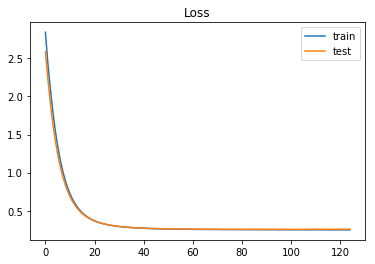

In [21]:
# plot loss during training
from matplotlib import pyplot
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [24]:
!head submission.csv

ID_code,target
test_0,0.21598607
test_1,0.3086131
test_2,0.053924948
test_3,0.1773441
test_4,0.053878162
test_5,0.005174865
test_6,0.014298981
test_7,0.13716787
test_8,0.005716175
